## 8 ions meta (130 V and 180 V)

This notebook uses the INTIME (integration time :) ) threshold to find transition points. <br> 

The integration times are systematically varied and ranges from 16ms to 28 ms. For each integration time, a range of k is plotted (k ranges from ~intersection of Poisson curves to a little over the lower tail of bright Poisson curve). 

-----
The analysis is done only for ion#5 because it is located at x=48 and y=93 which is the closest to the location of ion in single ion file (x=47;y=93). <br>The dark region is select between ion4 and ion 5 (x=45). 

##### About the algorithm: 

"data" is ion 5's dataframe. The code parses the dataframe in "steps" of length k (obtained from double poisson curve). If the total time of k photon hits is more than the integration time (dT) then we call it a bright state and assign it a value of "0". Otherwise we assign it a value "1". The state information is contained in the "state" column of data. 

In [2]:
from scipy.stats import poisson

In [3]:
import numpy as np
import scipy
import scipy.optimize
from scipy.optimize import curve_fit
from scipy import stats
import scipy.stats
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.colors as mcolors
from mpl_toolkits import mplot3d
import glob
import time
import pandas as pd
import math
#import File_functions
plt.rcParams["figure.figsize"] = (3,3)
print (time.ctime())

Sun Jan  9 22:58:06 2022


In [4]:
def Eight(x,y,xd,yd,file,plot,afterpulse_control = True):
    n=8
    
    #global filename 
    Eight.filename = file
    #x,y are lists containing x and y values of ions 
    
    x1,y1=x[0],y[0];x2,y2=x[1],y[1];x3,y3=x[2],y[2];x4,y4=x[3],y[3];
    x5,y5=x[4],y[4];x6,y6=x[5],y[5];x7,y7=x[6],y[6];x8,y8=x[7],y[7]
    
    xd,yd=xd,yd    #dark region

    #global old_data_table
    old_data_table = pd.read_csv(f'{filename}')
    old_data_table = old_data_table.drop(columns = 'Unnamed: 0')
    old_data_table['time'] = ((25*old_data_table['time'])/(4096)) #Output in ns

    
    
    R = 1 # radius of region of interest. Individual ions can be given different radii 
    #global Ion_1; global Ion_2; global Ion_3;global Ion_4
    #global Ion_5;global Ion_6; global Ion_7;global Ion_8;
    

    R1 = R
    Ion_1 = (
        old_data_table
        #.query("`cluster size` > 3")
        .query(f"{x1-R1} <= x <= {x1+R1} and {y1-2*R1} <= y <= {y1+2*R1}")
        .reset_index(drop=True)
    )
    
    #Loop that creates and saves the difference in time between events in the ROI
    name = Ion_1
    dt = []
    for i in range(0, len(name)-1):
        dt.append(name.at[i+1, 'time'] - name.at[i, 'time'])
    dt.append(0)
    Ion_1['dt'] = dt
    
    if afterpulse_control:
        Ion_1.query(f' dt > 1e-7', inplace = True) # eliminate after pulsing effects, this prevents breaks in dark states, and peaks at 0(s) bright states
        Ion_1.reset_index(inplace = True)
    Ion_1['index'] = np.arange(len(name)) # new index is used in certain functions in class: "Ion"
    
    
    ### Same for the rest of the Ions ### 
    R2 = R
    Ion_2 = (
        old_data_table
        #.query("`cluster size` > 3")
        .query(f"{x2-R2} <= x <= {x2+R2} and {y2-2*R2} <= y <= {y2+2*R2}")
        .reset_index(drop=True)
    )
    name = Ion_2
    dt = []
    for i in range(0, len(name)-1):
        dt.append(name.at[i+1, 'time'] - name.at[i, 'time'])
    dt.append(0)
    Ion_2['dt'] = dt
    
    if afterpulse_control:
        Ion_2.query(f' dt > 1e-7', inplace = True) # eliminate after pulsing effects, this prevents breaks in dark states, and peaks at 0(s) bright states
        Ion_2.reset_index(inplace = True)
    Ion_2['index'] = np.arange(len(name))
    
    R3 = R
    Ion_3 = (
        old_data_table
        #.query("`cluster size` > 3")
        .query(f"{x3-R3} <= x <= {x3+R3} and {y3-2*R3} <= y <= {y3+2*R3}")
        .reset_index(drop=True)
    )
    name = Ion_3
    dt = []
    for i in range(0, len(name)-1):
        dt.append(name.at[i+1, 'time'] - name.at[i, 'time'])
    dt.append(0)
    Ion_3['dt'] = dt
    
    if afterpulse_control:
        Ion_3.query(f' dt > 1e-7', inplace = True) # eliminate after pulsing effects, this prevents breaks in dark states, and peaks at 0(s) bright states
        Ion_3.reset_index(inplace = True)
    Ion_3['index'] = np.arange(len(name))
    
    R4 = R
    Ion_4 = (
        old_data_table
        #.query("`cluster size` > 3")
        .query(f"{x4-R4} <= x <= {x4+R4} and {y4-2*R4} <= y <= {y4+2*R4}")
        .reset_index(drop=True)
    )
    name = Ion_4
    dt = []
    for i in range(0, len(name)-1):
        dt.append(name.at[i+1, 'time'] - name.at[i, 'time'])
    dt.append(0)
    Ion_4['dt'] = dt
    
    if afterpulse_control:
        Ion_4.query(f' dt > 1e-7', inplace = True) # eliminate after pulsing effects, this prevents breaks in dark states, and peaks at 0(s) bright states
        Ion_4.reset_index(inplace = True)
    Ion_4['index'] = np.arange(len(name))
    
    R5 = R
    Ion_5 = (
        old_data_table
        #.query("`cluster size` > 3")
        .query(f"{x5-R5} <= x <= {x5+R5} and {y5-2*R5} <= y <= {y5+2*R5}")
        .reset_index(drop=True)
    )
    name = Ion_5
    dt = []
    for i in range(0, len(name)-1):
        dt.append(name.at[i+1, 'time'] - name.at[i, 'time'])
    dt.append(0)
    Ion_5['dt'] = dt
    
    if afterpulse_control:
        Ion_5.query(f' dt > 1e-7', inplace = True) 
        Ion_5.reset_index(inplace = True)
    Ion_5['index'] = np.arange(len(name))
    
    R6 = R
    Ion_6 = (
        old_data_table
        #.query("`cluster size` > 3")
        .query(f"{x6-R6} <= x <= {x6+R6} and {y6-2*R6} <= y <= {y6+2*R6}")
        .reset_index(drop=True)
    )
    name = Ion_6
    dt = []
    for i in range(0, len(name)-1):
        dt.append(name.at[i+1, 'time'] - name.at[i, 'time'])
    dt.append(0)
    Ion_6['dt'] = dt
    
    if afterpulse_control:
        Ion_6.query(f' dt > 1e-7', inplace = True) 
        Ion_6.reset_index(inplace = True)
    Ion_6['index'] = np.arange(len(name))
    
    
    R7 = R
    Ion_7 = (
        old_data_table
        #.query("`cluster size` > 3")
        .query(f"{x7-R7} <= x <= {x7+R7} and {y7-2*R7} <= y <= {y7+2*R7}")
        .reset_index(drop=True)
    )
    name = Ion_7
    dt = []
    for i in range(0, len(name)-1):
        dt.append(name.at[i+1, 'time'] - name.at[i, 'time'])
    dt.append(0)
    Ion_7['dt'] = dt
    
    if afterpulse_control:
        Ion_7.query(f' dt > 1e-7', inplace = True) 
        Ion_7.reset_index(inplace = True)
    Ion_7['index'] = np.arange(len(name))
    

    R8 = R
    Ion_8 = (
        old_data_table
        #.query("`cluster size` > 3")
        .query(f"{x8-R8} <= x <= {x8+R8} and {y8-2*R8} <= y <= {y8+2*R8}")
        .reset_index(drop=True)
    )
    name = Ion_8
    dt = []
    for i in range(0, len(name)-1):
        dt.append(name.at[i+1, 'time'] - name.at[i, 'time'])
    dt.append(0)
    Ion_8['dt'] = dt
    
    if afterpulse_control:
        Ion_8.query(f' dt > 1e-7', inplace = True) 
        Ion_8.reset_index(inplace = True)
    Ion_8['index'] = np.arange(len(name))
    
    
    # Creates a data set to call in the actual analysis Notebook
    #global data_table
    
    data_table = Ion_1
    data_table = data_table.append(Ion_2)
    data_table = data_table.append(Ion_3)
    data_table = data_table.append(Ion_4)
    data_table = data_table.append(Ion_5)
    data_table = data_table.append(Ion_6)
    data_table = data_table.append(Ion_7)
    data_table = data_table.append(Ion_8)
    Eight.data_table=data_table
    
    
    ## Dark Region referred to as "Dark Ion"
    Rd=R
    dark_Ion_1 = (
        old_data_table.query(f"{xd-Rd} <= x <= {xd+Rd} and {yd-2*Rd} <= y <= {yd+2*Rd}")
        .reset_index(drop=True)
        
    )
    
    name = dark_Ion_1
    dt = []
    for i in range(0, len(name)-1):
        dt.append(name.at[i+1, 'time'] - name.at[i, 'time'])
    dt.insert(0,0)
    dark_Ion_1['dt'] = dt
    
    if afterpulse_control:
        dark_Ion_1.query(f' dt > 1e-7', inplace = True) # eliminate after pulsing effects, this prevents breaks in dark states, and peaks at 0(s) bright states
        dark_Ion_1.reset_index(inplace = True)
    dark_Ion_1['index'] = np.arange(len(name))
    
    global dark_data_table
    dark_data_table=dark_Ion_1
     
        
    #Define the different ions with the given functions associated 
    # with the class: "Ion"
    #global ion_1; global ion_2;global ion_3;global ion_4;
    #global ion_5;global ion_6;global ion_7;global ion_8
    
    Eight.ion_1 = Ion(1, x1, y1,xd,yd, R1, Ion_1,dark_data_table)
    Eight.ion_2 = Ion(2, x2, y2,xd,yd, R2, Ion_2,dark_data_table)
    Eight.ion_3 = Ion(3, x3, y3,xd,yd, R3, Ion_3,dark_data_table)
    Eight.ion_4 = Ion(4, x4, y4,xd,yd, R4, Ion_4,dark_data_table)
    Eight.ion_5 = Ion(5, x5, y5,xd,yd, R5, Ion_5,dark_data_table)
    Eight.ion_6 = Ion(6, x6, y6,xd,yd, R6, Ion_6,dark_data_table)
    Eight.ion_7 = Ion(7, x7, y7,xd,yd, R7, Ion_7,dark_data_table)
    Eight.ion_8 = Ion(8, x8, y8,xd,yd, R8, Ion_8,dark_data_table)
    
    
    if plot==True:
        fig, (ax1, ax2,ax3) = plt.subplots(ncols = 3, figsize = (12, 4))
        ax1.hist2d(old_data_table['x'], old_data_table['y'], range = [(min(data_table['x'])-2, max(data_table['x'])+2), (min(data_table['y'])-2, max(data_table['y'])+2)], bins = (int(max(data_table['x']) - min(data_table['x']) +5) , int(max(data_table['y']) - min(data_table['y']) +5)))
        ax2.hist2d(data_table['x'], data_table['y'], range = [(min(data_table['x'])-2, max(data_table['x'])+2), (min(data_table['y'])-2, max(data_table['y'])+2)], bins = (int(max(data_table['x']) - min(data_table['x']) +5) , int(max(data_table['y']) - min(data_table['y']) +5)))
        ax3.hist2d(dark_data_table['x'], dark_data_table['y'], range = [(min(dark_data_table['x'])-2, max(dark_data_table['x'])+2), (min(dark_data_table['y'])-2, max(dark_data_table['y'])+2)], bins = (int(max(dark_data_table['x']) - min(dark_data_table['x']) +5) , int(max(dark_data_table['y']) - min(dark_data_table['y']) +5)))
        ax1.set_title("Full Data")
        ax2.set_title("True Ion ROI")
        ax3.set_title(f'ROI @x={xd}')
        plt.show()

In [5]:
class Ion:
    def __init__(self, n, x,y,x2,y2, r0,data,dark_data, debugPrinting=False):
        self.filename=Eight.filename
        self.n = n # Ion number (left to right)
        self.x = x # Ion x-position
        self.y = y # Ion y-position
        self.r0 = r0 # Ion radius
        
        #Dark ROI parameters 
        self.x2 = x2 # dark x-position
        self.y2= y2 # dark y-position
        self.r2 = r0 # dark radius (Same as Ion's)
 
        self.data = data # Dataframe used (data_table in choose_file)
        self.dark_data = dark_data #Dataframe for dark ROI 
        
        self.threshold = [] # differentiator between bright/dark states by 'dt' between events in ROI
        
        self.bright = [] # stores data for only bright events
        self.dark = [] # stores data for only dark events
        
        self.transpts = []  # Transition points (index number)
        # DtB = dark to bright
        # BtD = bright to dark
        self.tofBright=[]  
        self.tofDark=[]
        self.dtDark=[]
        self.dtBright=[]
        self.DtB = []
        self.BtD = []
        self.brightRanges = []

# auto_threshold finds threshold dt where sum of (area of dark ion to the left of threshold ) and (area of true ion
  # to the right of threshold) is minimal. 
    
    def auto_threshold(self,sigma, uncertainty_control ): 
                
                fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (11, 3))
                bin_heights, bin_borders, _ = ax1.hist(self.data['dt'], bins = 'auto', range = (0, 1e7), alpha = .5, label=(f'Ion {self.n}'), density = True)
                dark_heights, dark_borders, _ = ax1.hist(self.dark_data['dt'], bins = bin_borders, range = (0, 1e7), alpha = .5, label=(f'Dark @x= {self.x2}'), density = True) 
                                #dark bins same as true ion bins to locate threshold. 
                bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
                ax1.set_yscale('log')      
                 
                # Display parameters 
                ax1.set_title(f'{filename} Ion #{self.n}')
                ax1.set_ylabel(f'Probability (log-base)');
                ax1.set_xlabel(f'Time between events in ROI (ns)')

                # This part determines the theshold for the Bright/Dark state detection by minimizing area of overlap. 
                width=bin_centers[1]-bin_centers[0]
                summ=[]                # list containing areas when ith bin of dt is set as threshold.   
                for i in range (len(bin_centers)):
                    summ.append((sum(dark_heights[:i])*width)+(sum(bin_heights[i:])*width))
                idx=np.array(summ).argmin()    #index of smallest value in "sum"
                threshold=bin_centers[idx] # dt value (in  ns) corresponding to minimal area
                
                ax1.legend()
                ax1.axvline(threshold)

                print(f'Ion {self.n} ; threshold: {threshold*1e-9}(s)' )
             
                #Plot everything on a non-log base y-scale. 
                ax2.hist(self.data['dt'], bins = 'auto', range = (0, 1e7), alpha = .5, label=(f'Ion {self.n}'), density = True)
                ax2.hist(self.dark_data['dt'], bins = bin_borders, range = (0, 1e7), alpha = .5, label=(f'Dark @x= {self.x2}'), density = True)
                bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
                ax2.set_title(f'{filename} Ion #{self.n}')
                ax2.set_ylabel(f'Probability')
                ax2.set_xlabel(f'Time between events in ROI (ns)')
                ax2.axvline(threshold,label="Thresold")
                ax2.set_ylim(0,bin_heights.max()*1.05)
        
                ax2.legend()
                fig.tight_layout()

                self.threshold = threshold
                
    def sortbythreshold(self, uncertainty_control = False): #Sorts true ion into dark and bright regions 
        
            self.bright = self.data.query(f'dt < {self.threshold}')
            self.dark = self.data.query(f'dt > {self.threshold}')
 
    def transitions(self, single_photon_control = True):
       
        # identifies points where quantum jumps happen using list comprehension
        misscount = 0
        self.transpts.clear()
        for i in range(len(self.data)) :
            if i not in self.bright['index']:
                misscount = misscount + 1
                if misscount == 1:
                    self.transpts.append(i)
            if i in self.bright['index'] and misscount >= 1:
                misscount = 0
                self.transpts.append(i)
        
        
                
        # DtB = dark to bright
        # BtD = bright to dark
        self.DtB.clear()
        self.BtD.clear()
        for i in range(len(self.transpts)):
            if self.transpts[i] in self.bright['index']:
                self.DtB.append(self.transpts[i])
            else:
                self.BtD.append(self.transpts[i])
                
    def setup(self,kind,sigma, uncertainty_control, single_photon_control):
        
        if kind=="auto":
            self.auto_threshold(sigma,uncertainty_control)
            self.sortbythreshold(uncertainty_control)
            self.transitions(single_photon_control)
        elif kind=="integration":
            self.FindBrightRangesPrecise(arrT,N)
            
        elif kind=="dual":
            self.FindBrightRangesPrecise(arrT,N)
            
    def visRange(self, start, duration):
        
        # plots a small slice of data 
        # and uses red/blue color coding to distinguish between the bright and dark state
        # useful for visualizing the effects of different sorting methods
        
        end = start+duration # index values
        use = self.data.query(f'{start} <= index < {end}')
        index = use.index
        change = use['dt']
        linehere = []
        for j in index:
            if j in self.transpts:
                linehere.append(j)
        
        plt.figure(figsize=(15, 1.5))
        counting = index
        plt.scatter(counting, change)
        plt.title("Visual representation of ion states")
        plt.xlabel("Time (s)")
        plt.ylabel("time between photons (s)")
        plt.ylim(-15,25*self.threshold)

        if linehere != []:
            
            if index[0] in self.dark['index']:
                if index[0] in self.transpts:
                    plt.axvspan(self.data.at[index[0], 'index'], self.data.at[linehere[0], 'index'], alpha=0.3, color='blue')
                    plt.axvspan(start, self.data.at[index[0], 'index'], alpha=0.3, color='red',label="Bright")
                else:
                    plt.axvspan(start, self.data.at[linehere[0], 'index'], alpha=0.3, color='blue',label="Dark")
            if index[0] in self.bright['index']:
                if index[0] in self.transpts:
                    plt.axvspan(self.data.at[index[0], 'index'], self.data.at[linehere[0], 'index'], alpha=0.3, color='red')
                    plt.axvspan(start, self.data.at[index[0], 'index'], alpha=0.3, color='blue')
                else:
                    plt.axvspan(start, self.data.at[linehere[0], 'index'], alpha=0.3, color='red')

            if index[-1] in self.bright['index']:            
                plt.axvspan(self.data.at[linehere[-1], 'index'], end, alpha=0.3, color='red')
            if index[-1] in self.dark['index']:
                plt.axvspan(self.data.at[linehere[-1], 'index'], end, alpha=0.3, color='blue')
                
            for i in range(len(linehere)):
                plt.axvline(x=linehere[i])
            for i in range(len(linehere) - 1):
                if linehere[i] in self.DtB:
                    plt.axvspan(self.data.at[linehere[i], 'index'], self.data.at[linehere[i+1], 'index'], alpha=0.3, color='red')
                if linehere[i] in self.BtD:
                    plt.axvspan(self.data.at[linehere[i], 'index'], self.data.at[linehere[i+1], 'index'], alpha=0.3, color='blue')
            
            
        if linehere == []:
            if len(use) == (0 or 1):
                print(f'Ion {self.n} had {len(use)} hits during this time')
                plt.axvspan(start, end, alpha=0.3, color='blue')
            else:
                if index[0] in self.dark['index']:
                    plt.axvspan(self.data.at[index[0], 'index'], self.data.at[index[-1], 'index'], alpha=0.3, color='blue')
                else:
                    plt.axvspan(self.data.at[index[0], 'index'], self.data.at[index[-1], 'index'], alpha=0.3, color='red')
            plt.axvspan(self.data.at[index[-1], 'index'], end, alpha=0.3, color='blue')
            plt.axvspan(start, self.data.at[index[0], 'index'], alpha=0.3, color='blue')
            
        plt.xlim(start,end) 
        plt.axhline(self.threshold)
        plt.legend()
        plt.show()
 

               
#--------------
    #SarahEdwards Block

    def DeleteTooOldEvents(self, t, prevHits, currInterval):
        while (len(prevHits) > 0 and (t - prevHits[0] > self.dT)):
            if (len(prevHits) == self.N):
                assert (currInterval != None)
                lastRange = None
                if len(self.brightRanges) > 0:
                    lastRange = self.brightRanges[-1]
                if (lastRange != None and lastRange[1] >= currInterval[0]):
                    self.brightRanges.pop()
                    currInterval[0] = lastRange[0]

                currInterval[1] = prevHits[-1]
                self.brightRanges.append(currInterval)
                if self.debugPrinting:
                    print("bright ranges append %s" % currInterval)

            oldElem = prevHits.pop(0)
            if self.debugPrinting:
                print("remove %s, length %s" % (oldElem, len(prevHits)))
    def GetIntervalBegin(self, x):
        res = self.dT * (int)(x / self.dT)
        return res
    def IsBright(self, t):
        # is the ion bright at this time?
        for i in self.brightRanges:
            if (i[0] <= t and t <= i[1]):
                return True
        return False
    def GetCountsForEvents(self,T):
        # counts events within each integration time
        
        # build arrays xyt with just events in region
        self.dT = T    #integration time
        xi,yi = self.x,self.y
        events=self.data["time"]
      
        res = []
        l = 0
        r = 0
        while l < len(events):
            intervalStart = self.GetIntervalBegin(events[l])
            r = l + 1
            while r < len(events) and events[r] - intervalStart <= self.dT:
                r += 1
            res.append(r - l)
            # print("append %s, interval begin %s, interval end %s, dT %s" % (r-l, intervalStart, events[r-1], self.dT))
            l = r
            
            
        sumTime = max(events)-min(events)
        numberOfWindows = int(sumTime / self.dT)
        numberOfWindowsWithEvents = len(res)
        numberOfWindowsWithoutEvents = int(numberOfWindows - numberOfWindowsWithEvents)
        for i in range(numberOfWindowsWithoutEvents):
            res.append(0)
     
        bins = int(np.amax(res) - np.amin(res))
        entries, bin_edges, patches = plt.hist(res, bins=bins, density=True, label='Data')
        plt.ylabel("Probability")
        plt.xlabel("Counts per interval")
        plt.title(f"dT={self.dT*1e-9}(s)")
        plt.show()
        
        #following code guesses the point of intersection for scipy.optimize
         # ballpark is good enough as scipy.optimize will give a more accurate number. 
        
        f=int((max(res)/6))
        guess_lamb1=f
        guess_lamb2=max(res)*1/2
        
        return (res,guess_lamb1,guess_lamb2)
    
    
    
    def timeSplit(self, arrX, arrY, arrT):
        # called during integration time method 
        # to record which counts happen in the bright state 
        # and which happen in the dark state
        self.tofBright.clear()
        self.tofDark.clear()
        for j in range(0, len(arrT)):
            if OneIon.IsBright(arrT[j]) and OneIon.IsInRegion(arrX[j], arrY[j]):
                self.tofBright.append(arrT[j])
            if OneIon.IsBright(arrT[j]) == False and OneIon.IsInRegion(arrX[j], arrY[j]):
                self.tofDark.append(arrT[j])
    def dTimes(self, setthresh=False):
        self.dtimeB.clear()
        self.dtimeD.clear()
        
        dtimes = []
        if setthresh == False:
            for i in range(1, len(self.tofROI)):
                dtimes.append(self.tofROI[i]-self.tofROI[i-1])
                if self.tofROI[i] in self.tofBright:
                    self.dtimeB.append(self.tofROI[i]-self.tofROI[i-1])
                    self.brightindex.append(i)
                if self.tofROI[i] in self.tofDark:
                    self.dtimeD.append(self.tofROI[i]-self.tofROI[i-1])
                    self.darkindex.append(i)
        if setthresh == True:
            for i in range(1, len(self.tofROI)):
                if self.tofROI[i]-self.tofROI[i-1] <= self.threshold:
                    dtimes.append(self.tofROI[i]-self.tofROI[i-1])
                if self.tofROI[i] in self.tofBright:
                    if self.tofROI[i]-self.tofROI[i-1] <= self.threshold:
                        self.dtimeB.append(self.tofROI[i]-self.tofROI[i-1])
                    self.brightindex.append(i)
                if self.tofROI[i] in self.tofDark:
                    self.dtimeD.append(self.tofROI[i]-self.tofROI[i-1])
                    self.darkindex.append(i)


#--------------------------------

    
# 1. integration time method
    def FindBrightRangesPrecise(self, arrX, arrY, arrT):
        prevHits = []
        self.brightRanges = []
        currInterval = None

        for idx in range(len(arrX)):
            if self.IsInRegion(arrX[idx], arrY[idx]):
                t = arrT[idx]
                if self.debugPrinting:
                    print("check %s" % t)
                self.DeleteTooOldEvents(t, prevHits, currInterval)
                prevHits.append(t)
                if len(prevHits) == self.N:
                    currInterval = [prevHits[0], prevHits[-1]]
                    if self.debugPrinting:
                        print("curr interval is started as %s-%s" % (prevHits[0], prevHits[-1]))

        self.DeleteTooOldEvents(1e14, prevHits, currInterval)
        self.timeSplit(arrX, arrY, arrT)
    
    
    def FittingPoisson_double(self, res, guess_lamb1, guess_lamb2,T):
        
        print (f'Ion {self.n} ')
        
        bins = int(np.amax(res) - np.amin(res))
        entries, bin_edges, patches = plt.hist(res, bins=bins,density=True, label='Data',color="skyblue")
        bin_centers=(bin_edges[:-1]+bin_edges[1:])/2
        
        guess = np.array([guess_lamb1, guess_lamb2])
        print ("Guess:",guess[0],",",guess[1])
        
        def fit_function(k, lamb1, lamb2):             #fits double poisson to data 
            p=poisson.pmf(k, lamb1) + poisson.pmf(k, lamb2)
            p_mag=np.sum(poisson.pmf(k, lamb1) + poisson.pmf(k, lamb2))
            return (p/p_mag)                           #normalized poisson
        
        popt1, cov1 = scipy.optimize.curve_fit(fit_function, bin_edges[:-1], 
                                               entries, p0=guess, maxfev=50000)  # returns best fit 
       
        L1,L2=popt1[0],popt1[1]                                               #mu of each poisson
        k=math.ceil((L1-L2)/math.log(L1/L2))                              #point of intersection 
        print ("min # photons:",k,"\n",'mean counts in bright state =',np.amax(popt1),'\n', 'mean counts in dark state =', np.amin(popt1))
        
        # plot fit
        
        data_fit = fit_function(bin_edges[:-1], *popt1)
        plt.plot(bin_edges[:-1], data_fit,color="r",ls="--",label="Poisson fit")
        plt.title(f'Histogram of Photon Emissions per {self.dT*1e-9} s')
        plt.xlabel("# photon emissions")
        plt.ylabel("counts")
        plt.legend()
        plt.show()    

    # 3. combination of the above two
    def comboSorting(self, arrX, arrY, arrT, lowavg=False):
        # sorts data using integration time method and then corrects using threshold
        self.FindBrightRangesPrecise(arrX, arrY, arrT)
        self.dTimes()
        self.transitions()
        for i in range(len(self.BtD)):
            while self.tofROI[self.BtD[i]-1]-self.tofROI[self.BtD[i]-2] >= self.threshold:
                for j in range(len(self.transpts)):
                    if self.transpts[j] == self.BtD[i]:
                        self.transpts[j] = self.transpts[j]-1
                self.BtD[i] = self.BtD[i] - 1
        
        self.transitionCorrection()
    def transitionCorrection(self):
        # helper function for comboSorting
        # makes sure every array is consistent with the corrections it makes to transition points
        DBtruth = 0
        # 0 for dark 1 for bright
        if self.transpts[0] in self.DtB:
            DBtruth = 0
        if self.transpts[0] in self.BtD:
            DBtruth = 1
        
        self.tofBright.clear()
        self.tofDark.clear()
        for i in range(len(self.tofROI)):
            if i in self.BtD:
                DBtruth = 0
            if i in self.DtB:
                DBtruth = 1
            
            if DBtruth == 0:
                self.tofDark.append(self.tofROI[i])
            if DBtruth == 1:
                self.tofBright.append(self.tofROI[i])

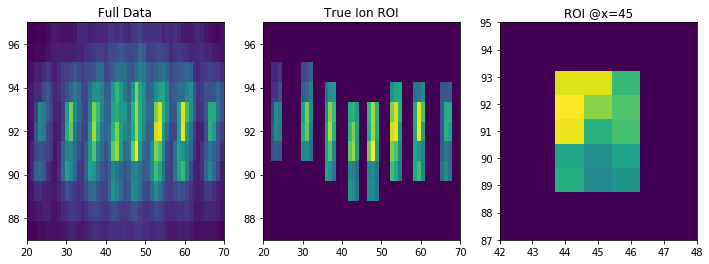

In [6]:
filename='8ions_180V_meta'
Eight(x=[23,31,37,43,48,54,60,67],y=[93,93,92,91,91,92,92,92],xd=45,yd=91,file=filename,plot=True)
       
       # x is the radial location of each ion passed as an array. Likewise for y. 
       # xd,yd are coordinates of "dark ion"
       # plot=True is passed to obtain the 2d histograms (as seen below).

In [7]:
ion_1,ion_2,ion_3,ion_4=Eight.ion_1,Eight.ion_2,Eight.ion_3,Eight.ion_4
ion_5,ion_6,ion_7,ion_8=Eight.ion_5,Eight.ion_6,Eight.ion_7,Eight.ion_8

In [9]:
def transitions(single_photon_control = True): #finds transition points
        global transpts;global DtB; global BtD
        # identifies points where quantum jumps happen using list comprehension
        misscount = 0
        transpts=[]
        #self.transpts.clear()
        for i in range(len(data)) :
            if i not in bright['index']:
                misscount = misscount + 1
                if misscount == 1:
                    transpts.append(i)
            if i in bright['index'] and misscount >= 1:
                misscount = 0
                transpts.append(i)
        
        
                
        # DtB = dark to bright
        # BtD = bright to dark
        #self.DtB.clear()
        #self.BtD.clear()
        DtB=[]
        BtD=[]
        for i in range(len(transpts)):
            if transpts[i] in bright['index']:
                DtB.append(transpts[i])
            else:
                BtD.append(transpts[i])

Plotting INTIME graph for 25 ms

### Plots to approximate k (max dark photons)

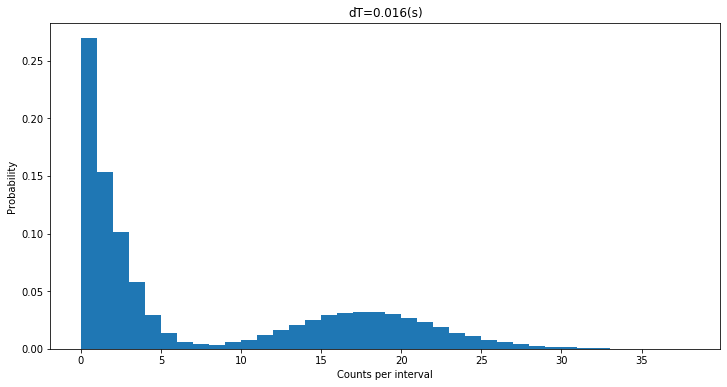

Ion 5 
Guess: 1 , 19
min # photons: 6 
 mean counts in bright state = 17.772671204663947 
 mean counts in dark state = 0.7019643326938807


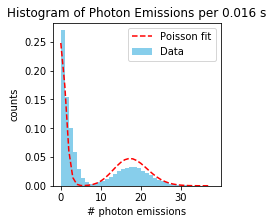

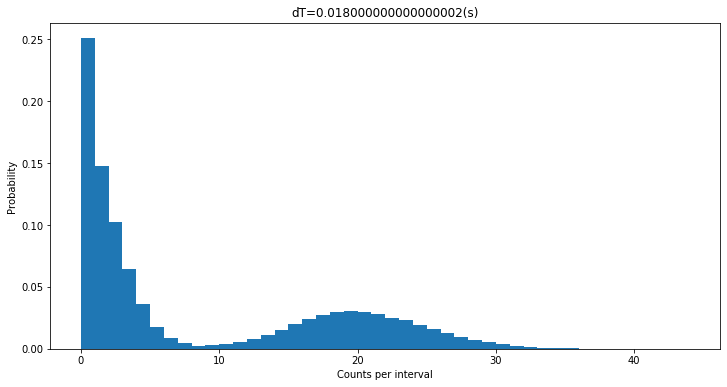

Ion 5 
Guess: 1 , 19
min # photons: 6 
 mean counts in bright state = 19.97753177971828 
 mean counts in dark state = 0.7796592058660231


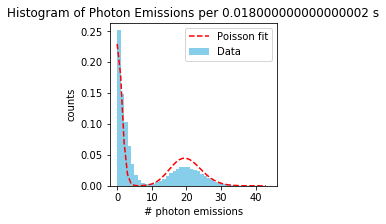

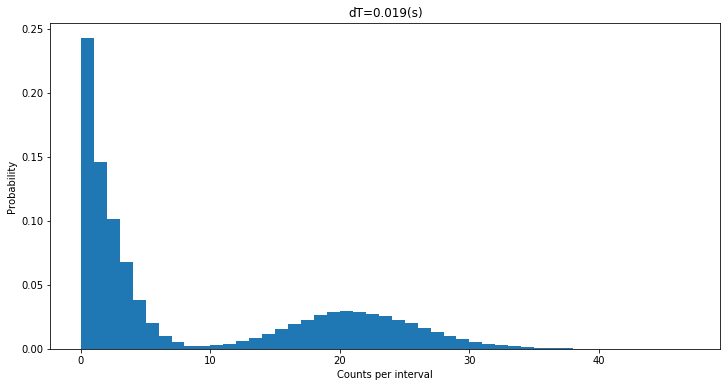

Ion 5 
Guess: 1 , 19
min # photons: 7 
 mean counts in bright state = 21.097142216859254 
 mean counts in dark state = 0.8155201144726582


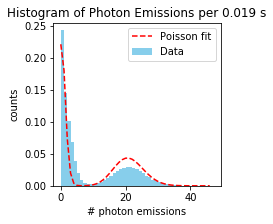

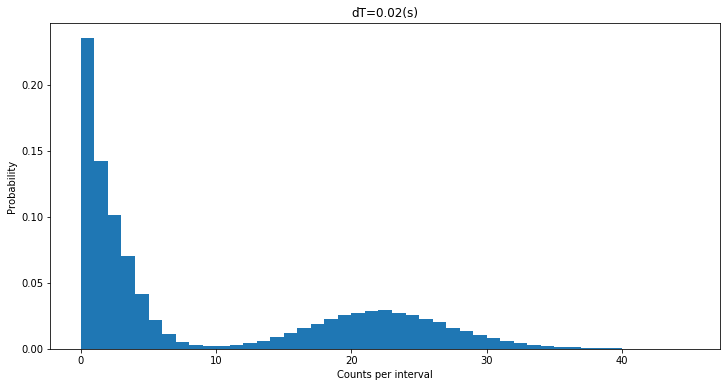

Ion 5 
Guess: 1 , 19
min # photons: 7 
 mean counts in bright state = 22.18668789676943 
 mean counts in dark state = 0.8520219457848139


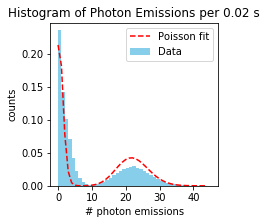

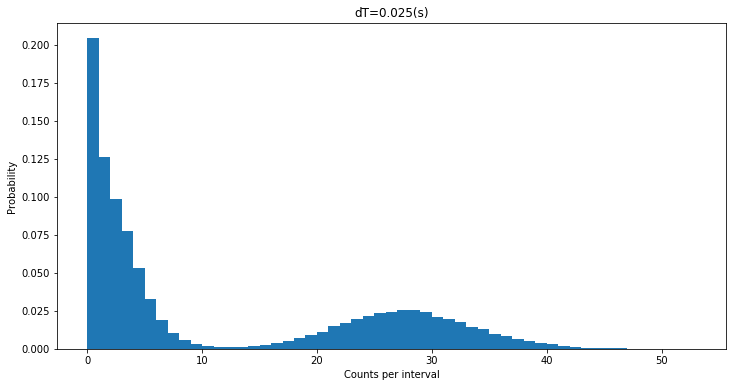

Ion 5 
Guess: 1 , 19
min # photons: 9 
 mean counts in bright state = 27.693208157484882 
 mean counts in dark state = 1.0348844682478298


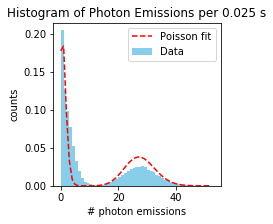

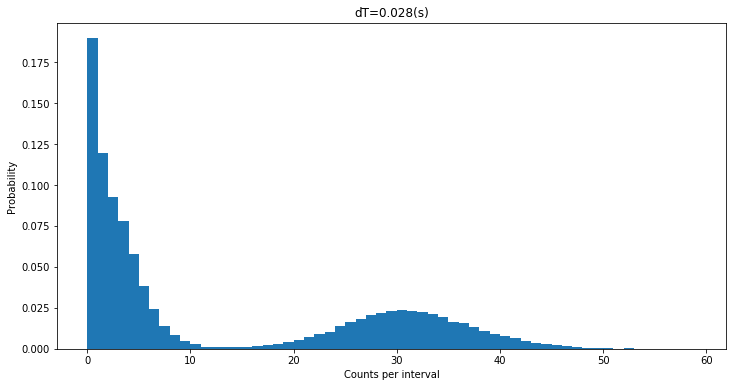

Ion 5 
Guess: 1 , 19
min # photons: 10 
 mean counts in bright state = 30.97095580973481 
 mean counts in dark state = 1.137207736433055


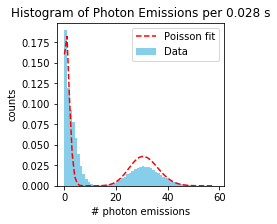

In [27]:
dT_list=[1.6e7,1.8e7,1.9e7,2e7,2.5e7,2.8e7] # 16-28 ms integration times
for time in range (len(dT_list)):
    dT=dT_list[time]
    plt.figure(figsize=(12,6))
    res,guess_1,guess_2=ion_5.GetCountsForEvents(dT)
    ion_5.FittingPoisson_double(res, 1, 19,dT) # res is counts; also pass mu of each poisson (ballparked)

Transitions 4778 Rate: 1.5725912857139044


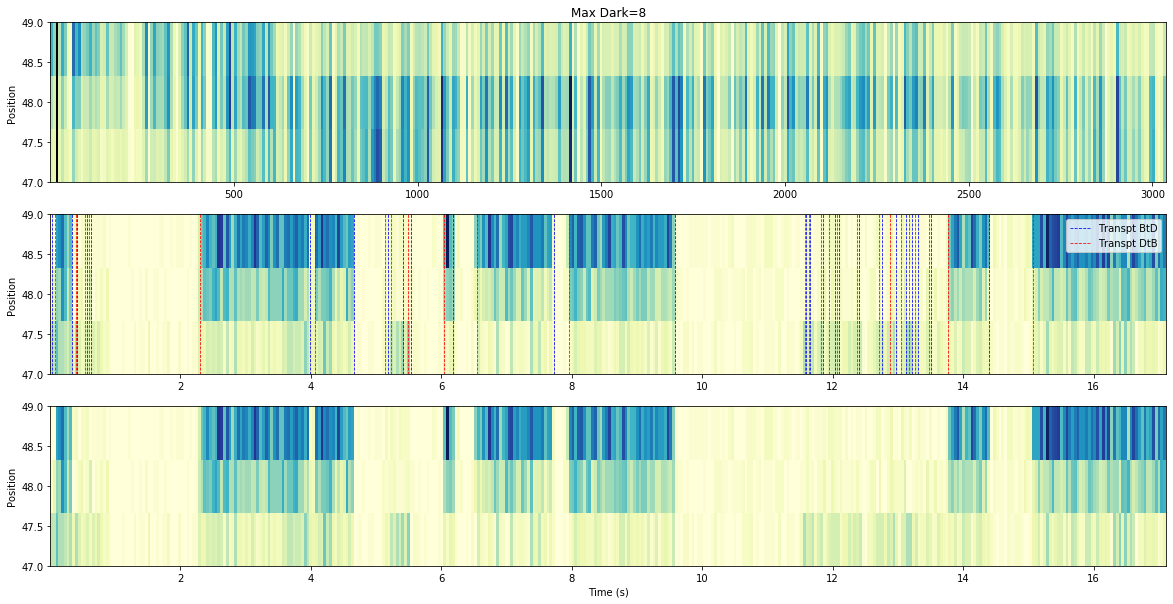

Transitions 3536 Rate: 1.1638097083056438


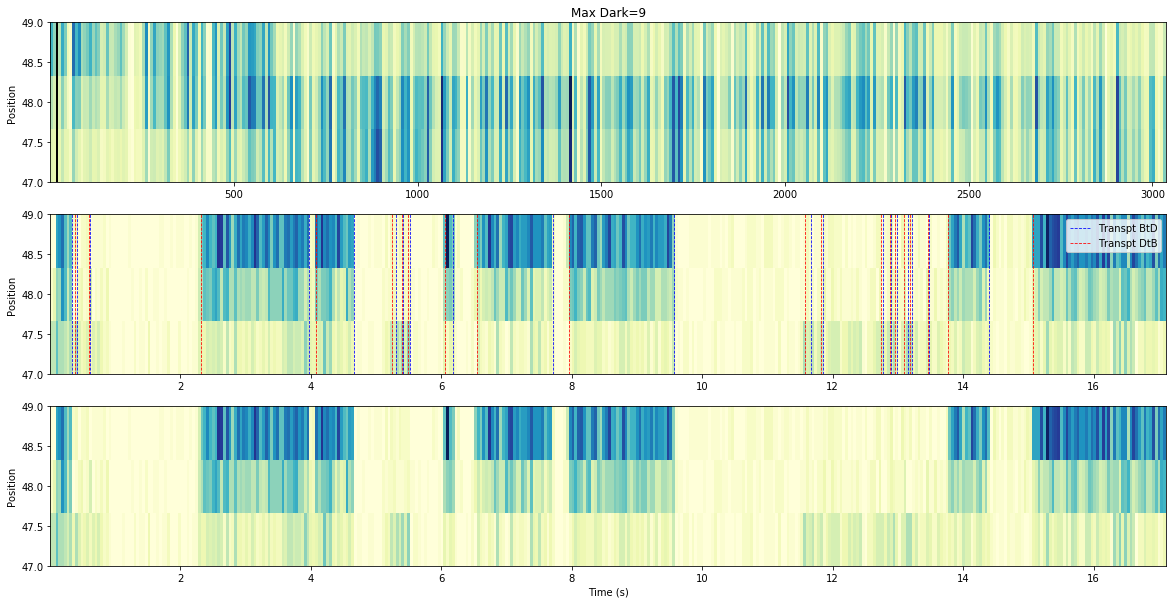

Transitions 2770 Rate: 0.9116948224000659


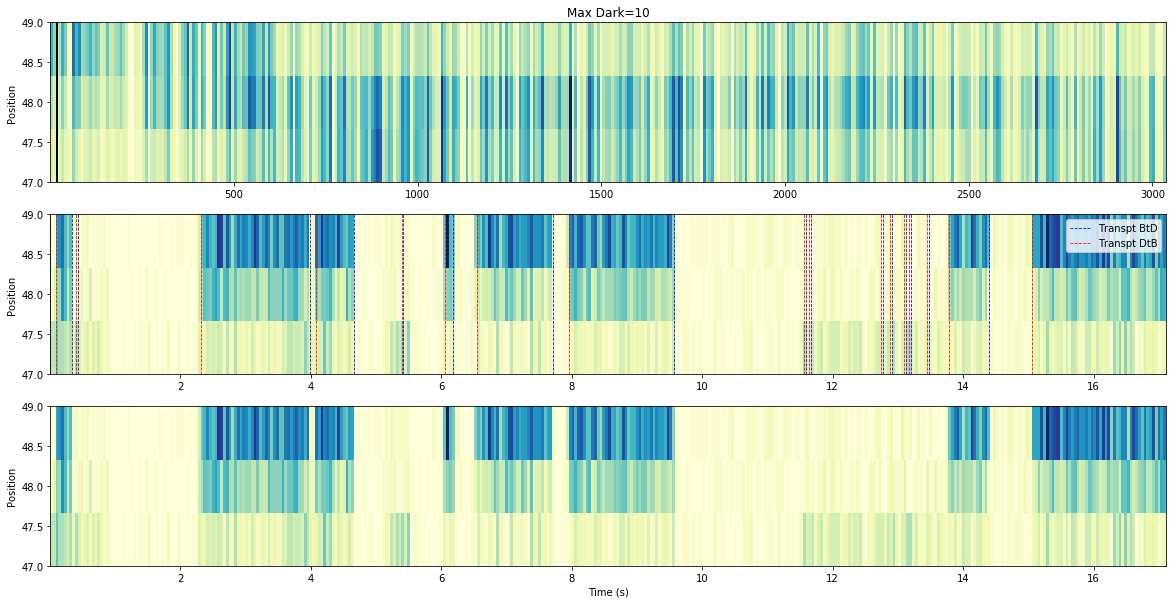

Transitions 2366 Rate: 0.7787256136456882


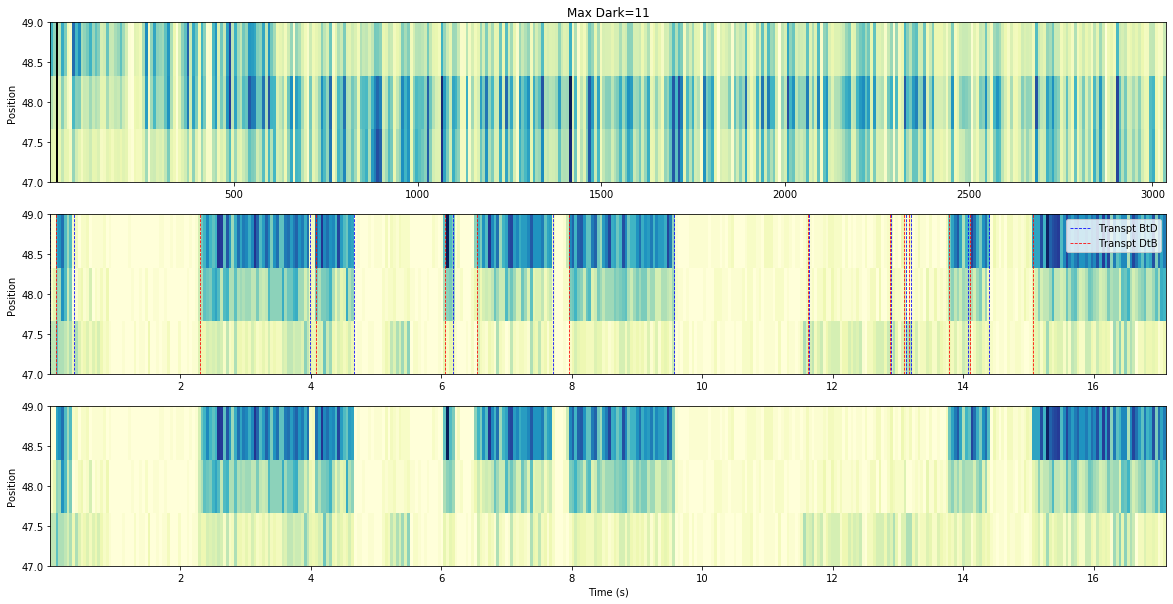

Transitions 2220 Rate: 0.7306723847394031


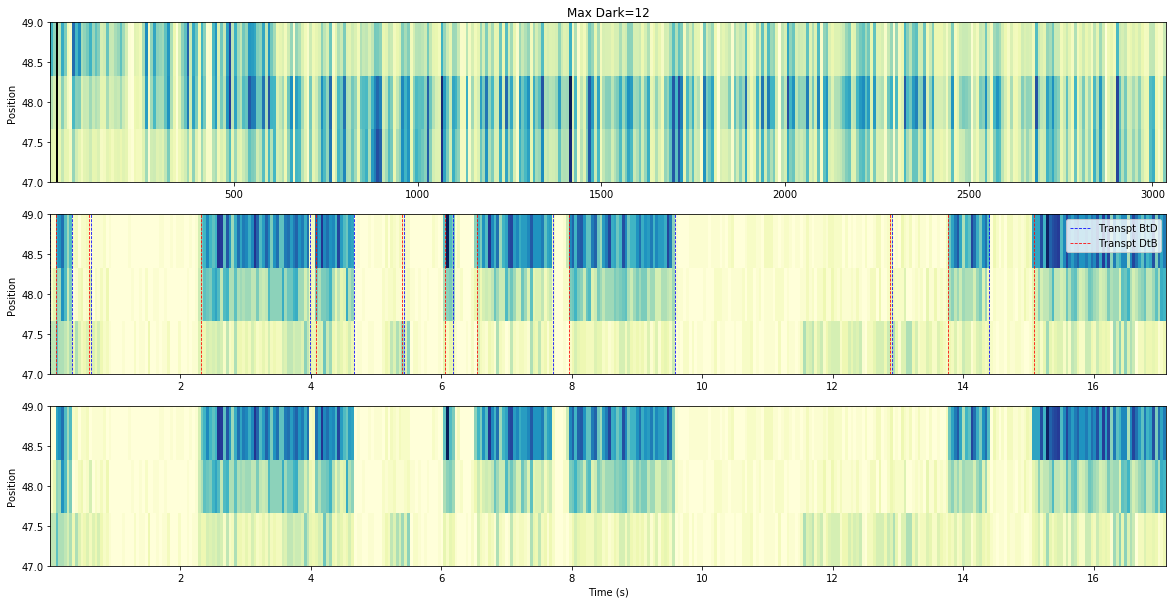

Transitions 2168 Rate: 0.7135575360878494


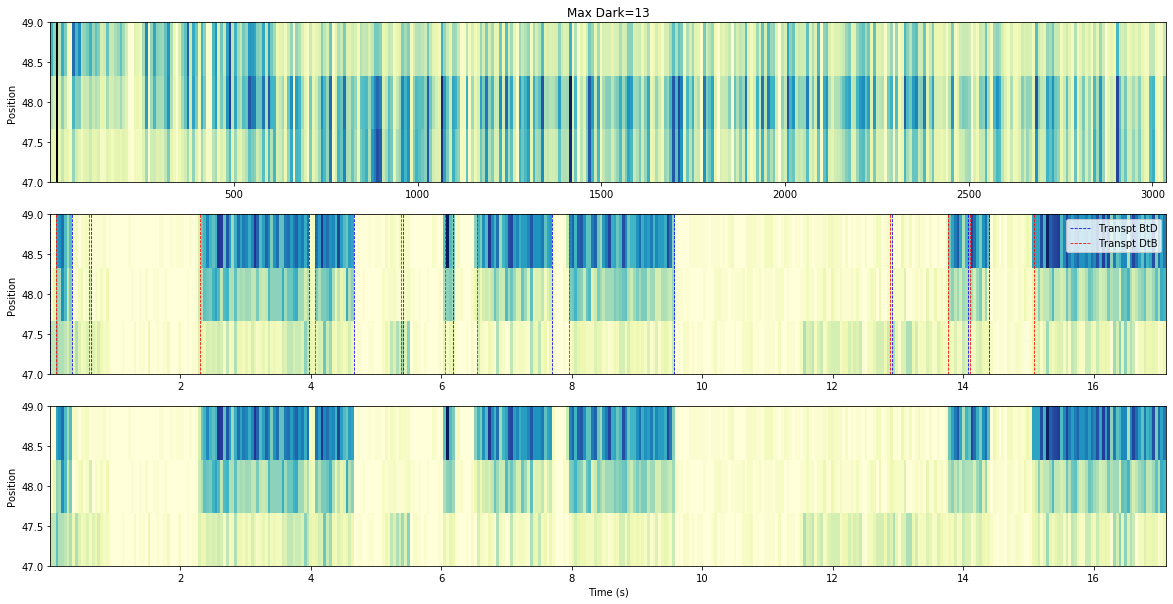

Transitions 2126 Rate: 0.6997340044846716


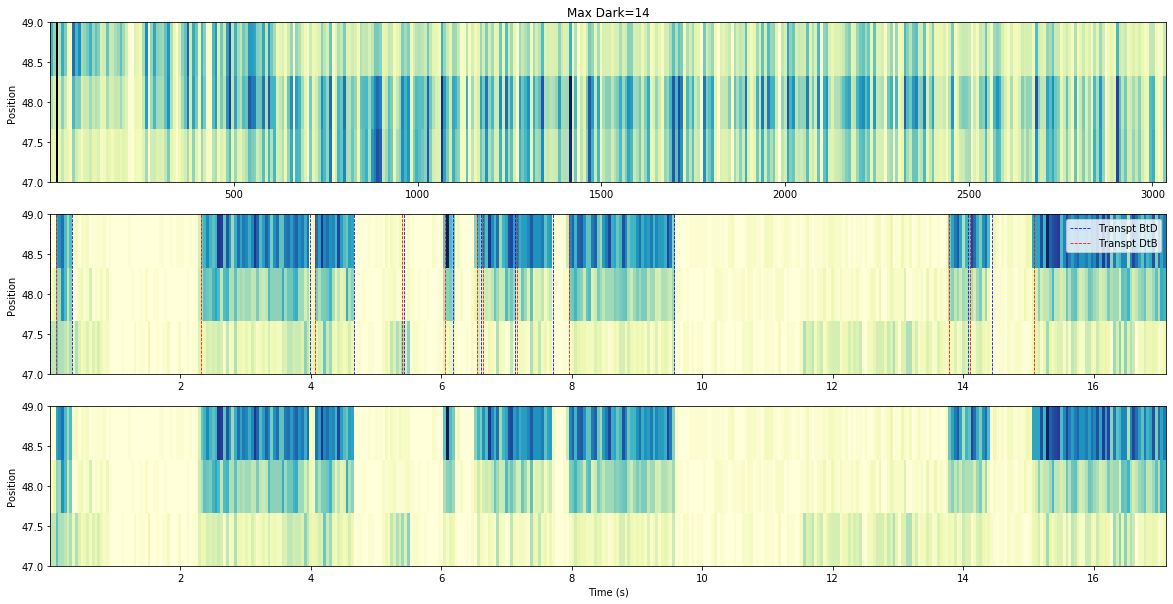

Transitions 2188 Rate: 0.7201401701846009


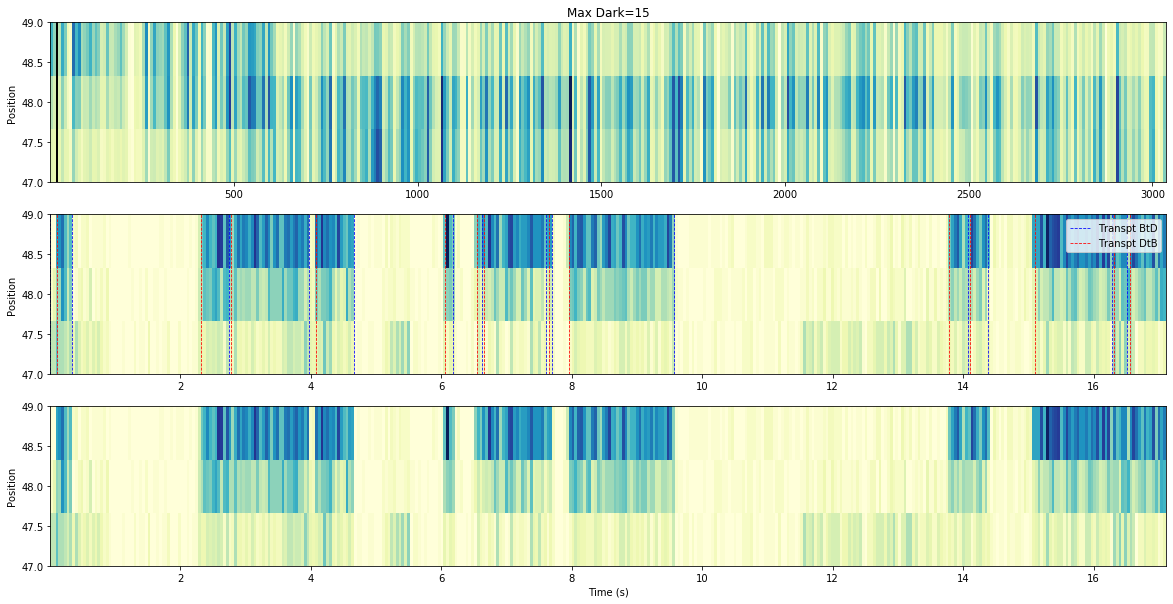

Transitions 2234 Rate: 0.735280228607129


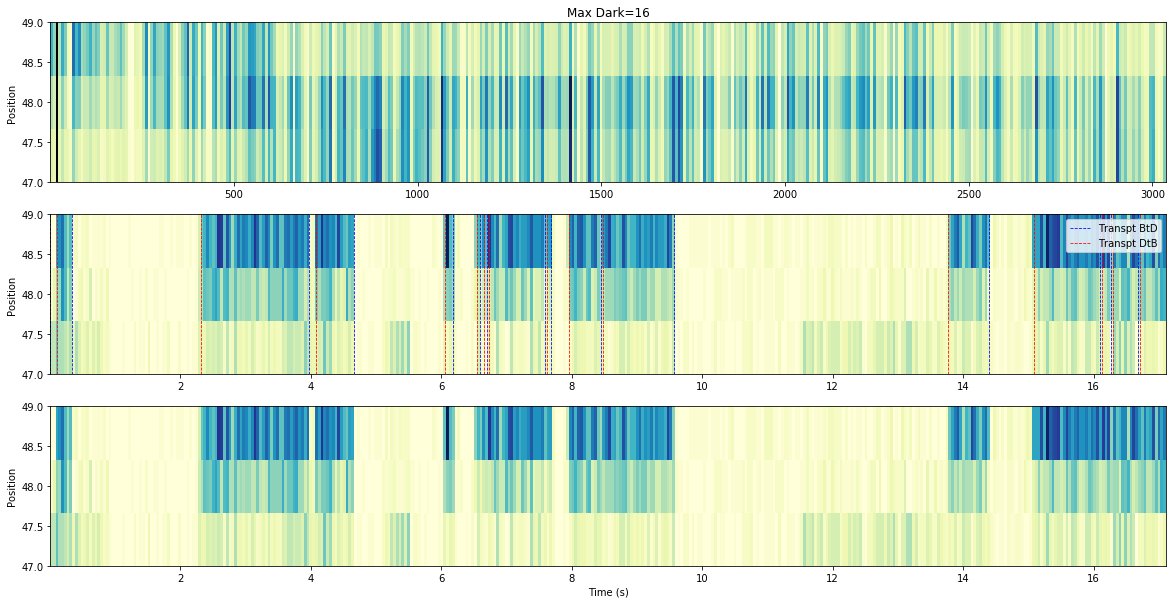

Transitions 2404 Rate: 0.7912326184295158


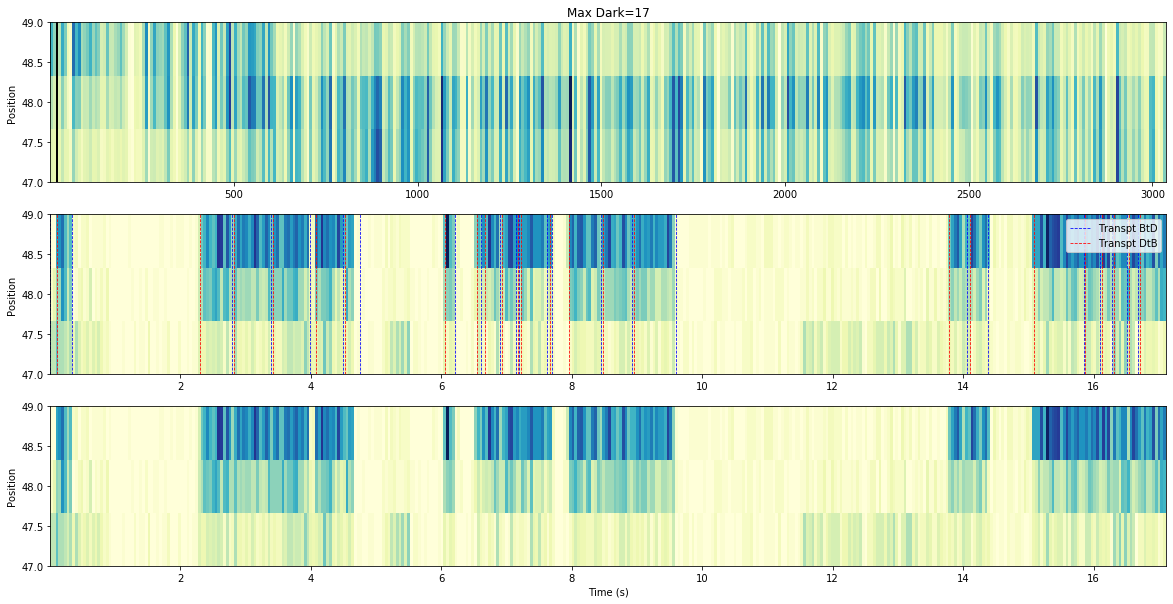

Transitions 2632 Rate: 0.8662746471324815


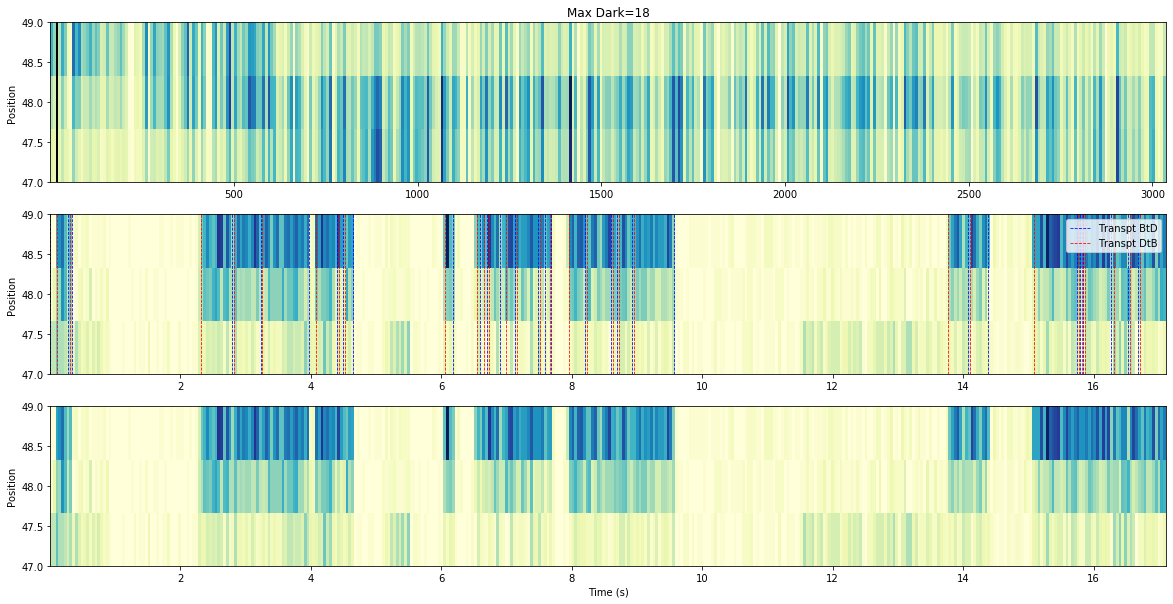

Transitions 3056 Rate: 1.0058264899836107


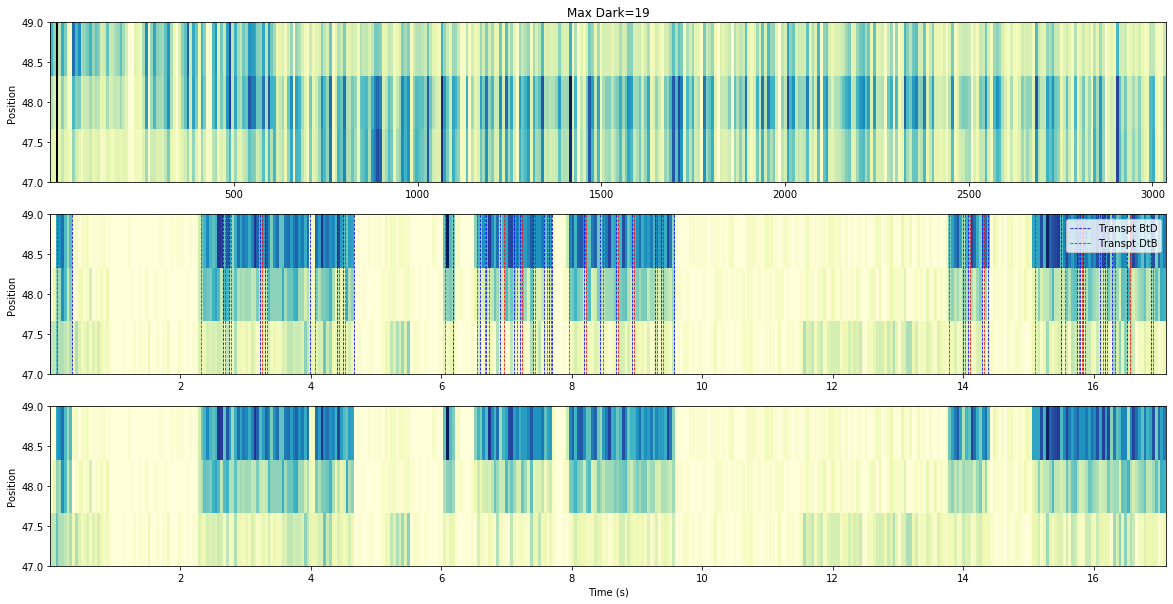

In [45]:
dT=2.8e7
rate_28e7=[]
for j in range (8,20):
    data=ion_5.data.copy()
    steps=j  # max dark photons in dT=> (steps+1): min bright photons in dT
    state=[]
    for i in range(min(data.index),max(data.index),steps):
        if (i+steps-1)<len(data):
            if (data["time"][i+steps-1]-data["time"][i])<dT: # bright state
                state.extend(([1]*steps))
            else: state.extend(([0]*steps))
        else:
            hits=len(data[i:]) #number of hits left
            max_dT=dT/(steps+1) #max mean time difference between two hits in bright state
            if (max(data["time"])-data["time"][i])>(max_dT*hits):
                state.extend(([0]*len(data[i:])))
            else: state.extend(([1]*len(data[i:])))
    data["state"]=state
    bright=data[data["state"]==1]
    dark=data[data["state"]==0]
    transitions()
    hline_BtD=np.array((data.iloc[BtD]["time"])*1e-9) #transition lines for the plot
    hline_DtB=np.array((data.iloc[DtB]["time"])*1e-9)
    rate=len(transpts)/((max(data["time"])-min(data["time"]))*1e-9)
    print ("Transitions", len(transpts), "Rate:",rate)
    rate_28e7.append(rate)
# plotting
    fig,(ax,ax1,ax2)=plt.subplots(3,1,figsize=(20,10))
    ax.set_title(f"Max Dark={j}") 
    ax.hist2d((data["time"]*1e-9),data["x"],bins=(400,3),cmap="YlGnBu")
    ax.set_ylabel("Position")

    #plotting the first 8000 events 

    ax1.hist2d((data["time"][:8000]*1e-9),data["x"][:8000],bins=(400,3),cmap="YlGnBu")
    ax1.vlines(hline_BtD,40,60,color="b",lw=0.8,ls="--",label="Transpt BtD")
    ax1.vlines(hline_DtB,40,60,color="r",lw=0.8,ls="--",label="Transpt DtB")
    ax1.set_ylabel("Position")
    ax1.legend()

    ax2.hist2d((data["time"][:8000]*1e-9),data["x"][:8000],bins=(400,3),cmap="YlGnBu")
    ax2.set_ylabel("Position")
    ax2.set_xlabel("Time (s)")
    ax.axvline(17,c="k",lw=2)

    plt.show()

(Transition rates are in seconds)

### 25 ms

In [ ]:
dT=2.5e7
rate_25e7=[]
for j in range (7,18):
    data=ion_5.data.copy()
    steps=j  # max dark photons in dT=> (steps+1): min bright photons in dT
    state=[]
    for i in range(min(data.index),max(data.index),steps):
        if (i+steps-1)<len(data):
            if (data["time"][i+steps-1]-data["time"][i])<dT: # bright state
                state.extend(([1]*steps))
            else: state.extend(([0]*steps))
        else:
            hits=len(data[i:]) #number of hits left
            max_dT=dT/(steps+1) #max mean time difference between two hits in bright state
            if (max(data["time"])-data["time"][i])>(max_dT*hits):
                state.extend(([0]*len(data[i:])))
            else: state.extend(([1]*len(data[i:])))
    data["state"]=state
    bright=data[data["state"]==1]
    dark=data[data["state"]==0]
    transitions()
    hline_BtD=np.array((data.iloc[BtD]["time"])*1e-9) #transition lines for the plot
    hline_DtB=np.array((data.iloc[DtB]["time"])*1e-9)
    rate=len(transpts)/((max(data["time"])-min(data["time"]))*1e-9)
    print ("Transitions", len(transpts), "Rate:",rate)
    rate_25e7.append(rate)

        
# plotting
    fig,(ax,ax1,ax2)=plt.subplots(3,1,figsize=(20,10))
    ax.set_title(f"Max Dark={j}") 
    ax.hist2d((data["time"]*1e-9),data["x"],bins=(400,3),cmap="YlGnBu")
    ax.set_ylabel("Position")

    #plotting the first 8000 events 

    ax1.hist2d((data["time"][:8000]*1e-9),data["x"][:8000],bins=(400,3),cmap="YlGnBu")
    ax1.vlines(hline_BtD[:],40,60,color="b",lw=0.8,ls="--",label="Transpt BtD")
    ax1.vlines(hline_DtB[:],40,60,color="r",lw=0.8,ls="--",label="Transpt DtB")
    ax1.set_ylabel("Position")
    ax1.legend()

    ax2.hist2d((data["time"][:8000]*1e-9),data["x"][:8000],bins=(400,3),cmap="YlGnBu")
    ax2.set_ylabel("Position")
    ax2.set_xlabel("Time (s)")
    ax.axvline(17,c="k",lw=2)

    plt.show()

### 20 ms

Transitions 3070 Rate: 1.0104343338513366


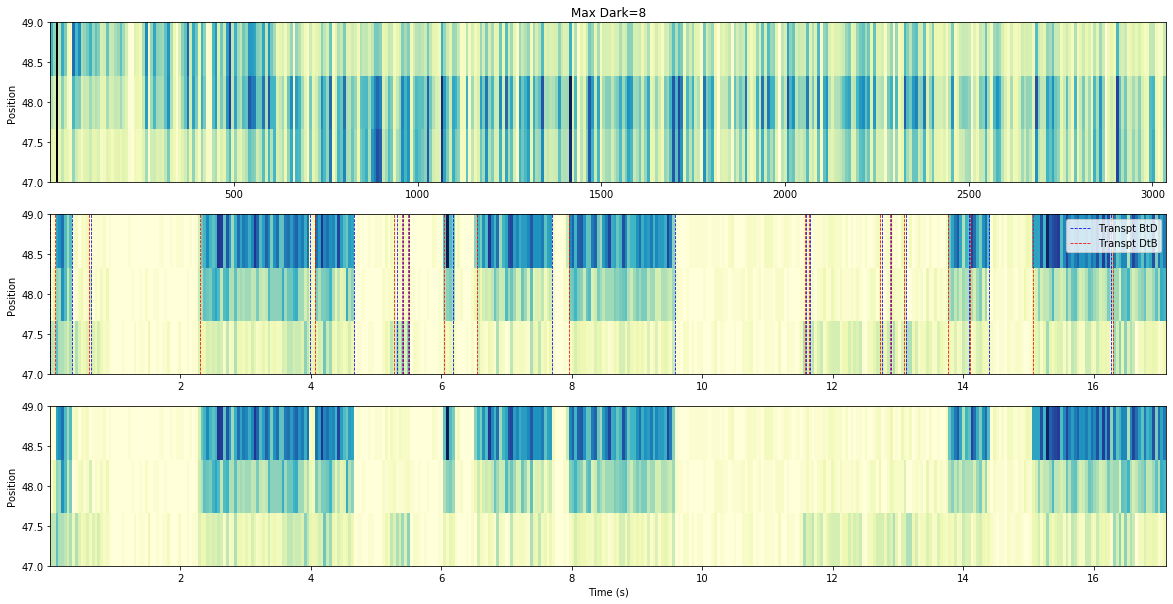

Transitions 2538 Rate: 0.83533626687775


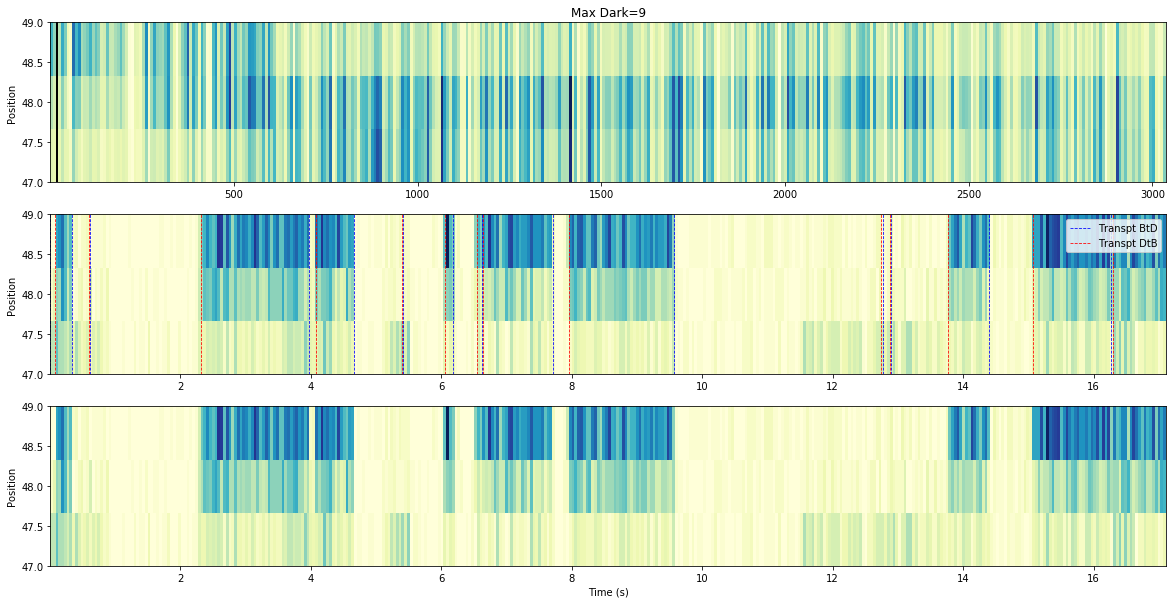

Transitions 2448 Rate: 0.8057144134423687


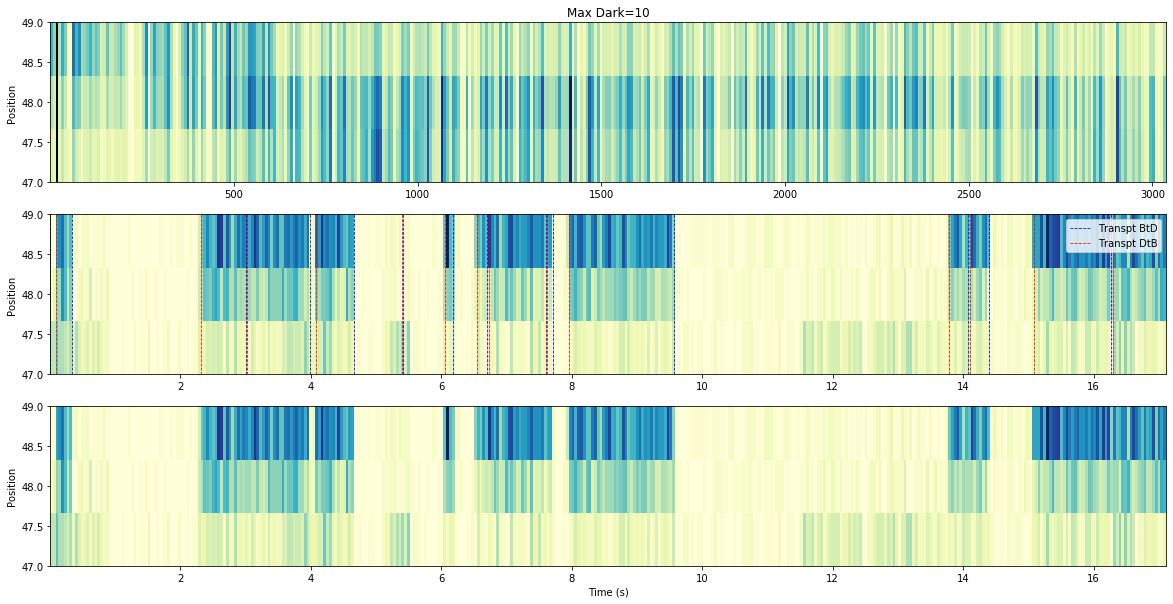

Transitions 2598 Rate: 0.8550841691680041


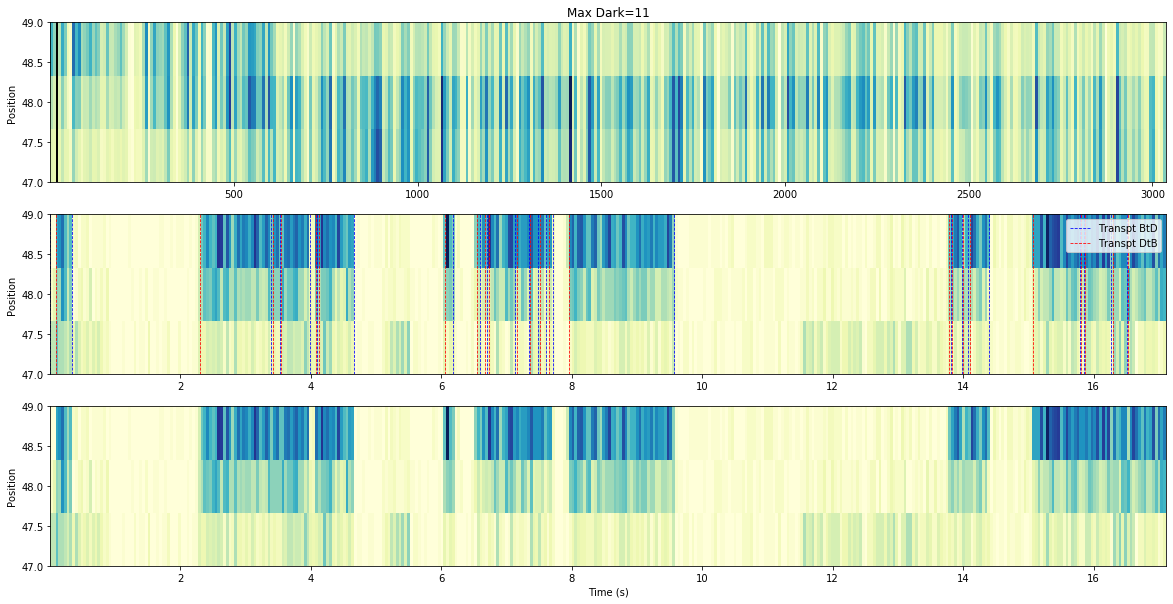

Transitions 3062 Rate: 1.0078012802126362


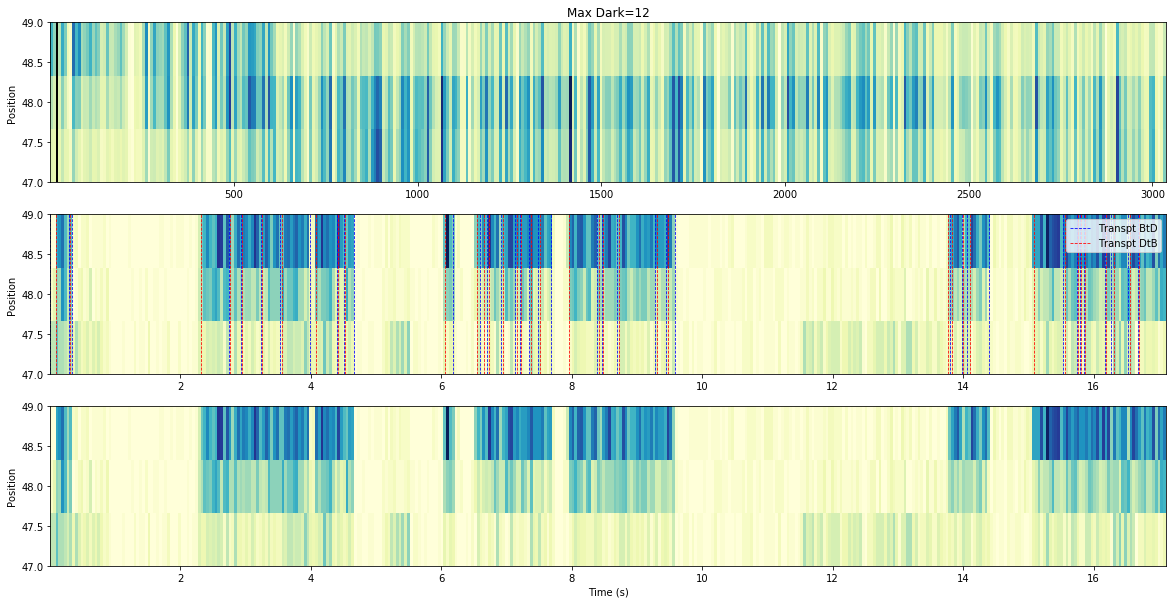

Transitions 3938 Rate: 1.2961206536503465


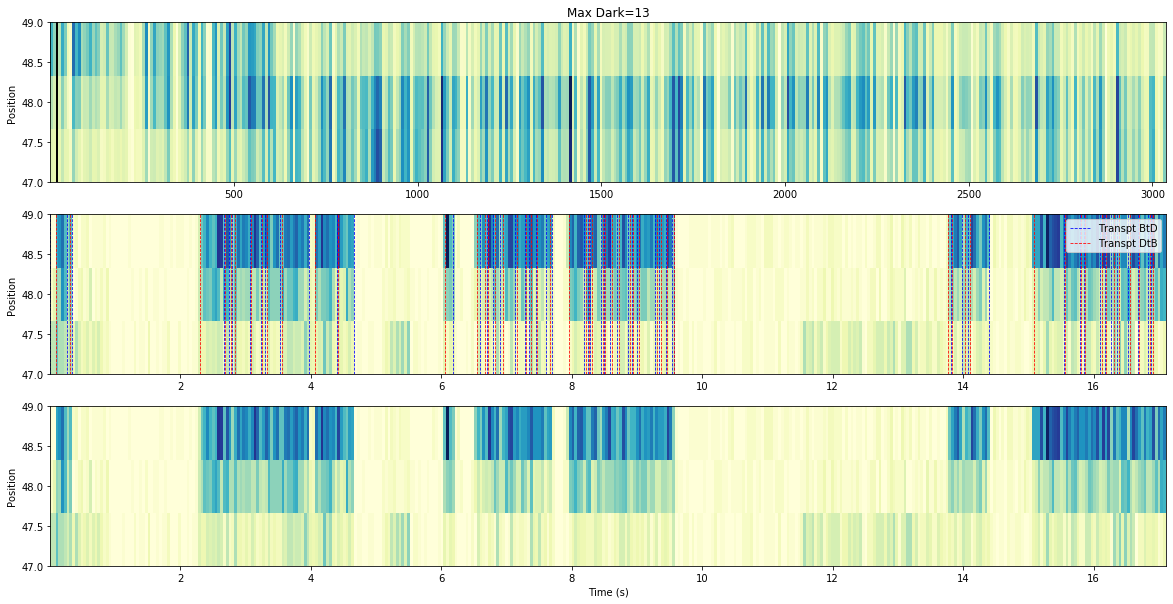

Transitions 5192 Rate: 1.708851811516658


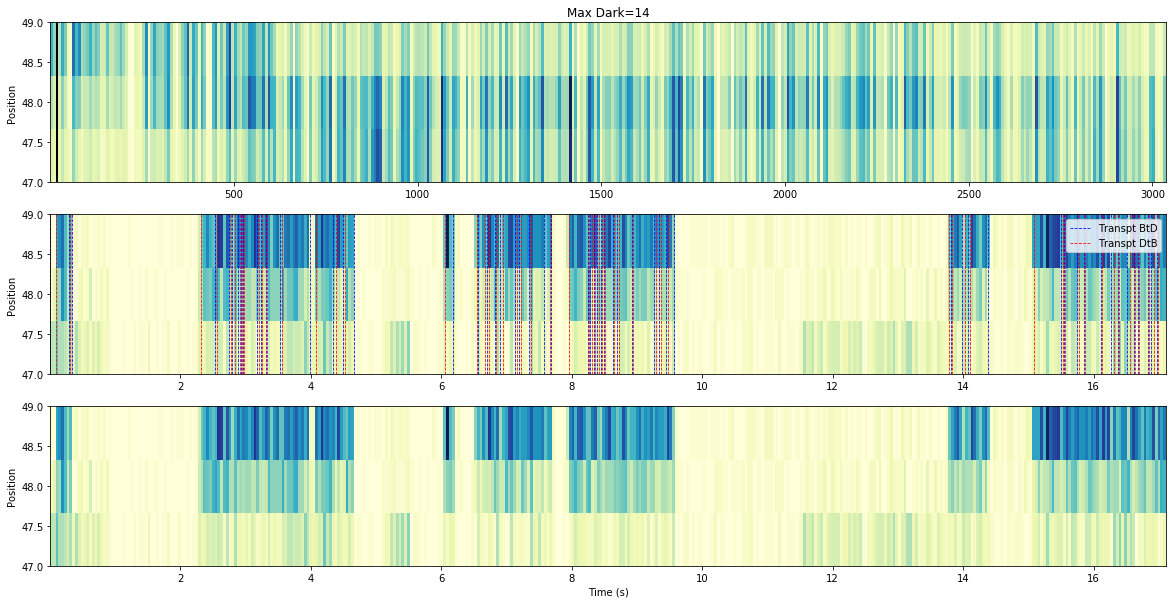

Transitions 6924 Rate: 2.278907924295327


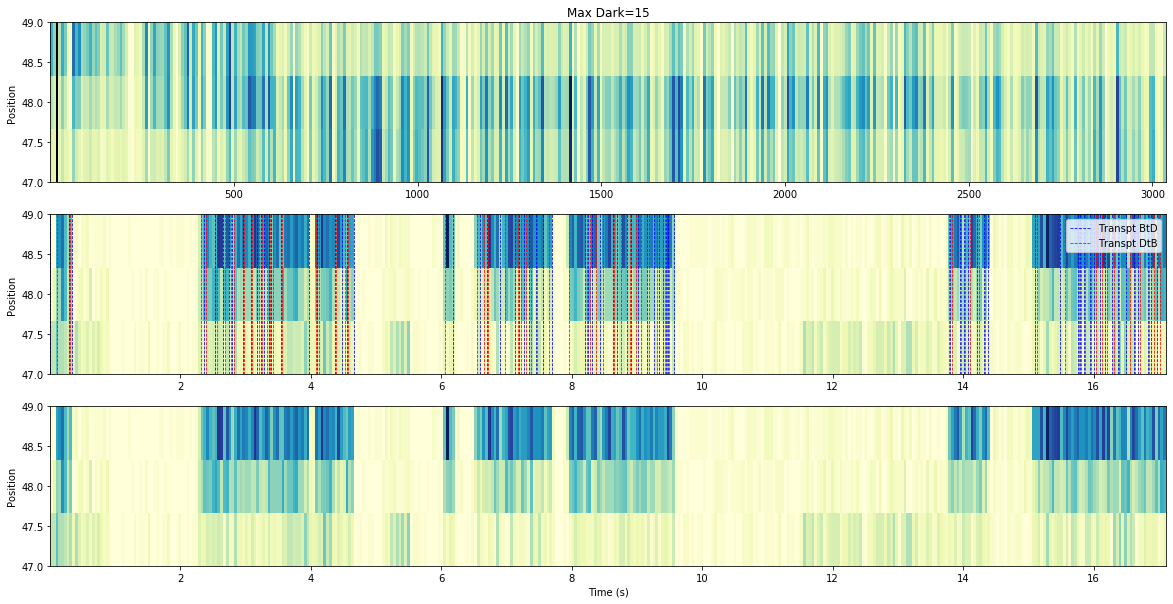

Transitions 9328 Rate: 3.070140542724843


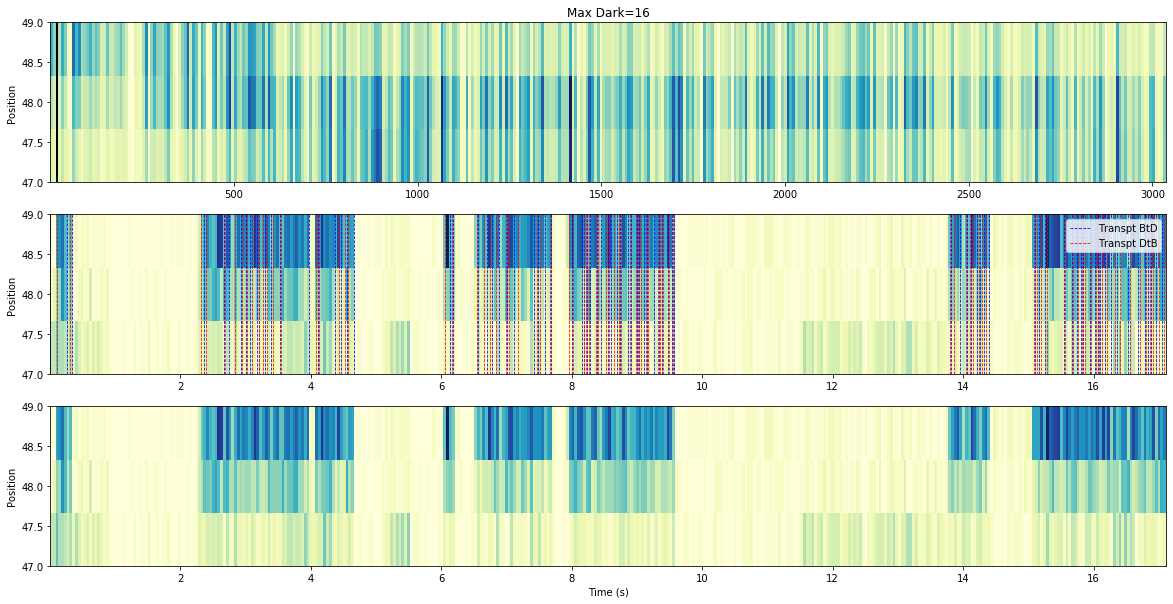

Transitions 12220 Rate: 4.021989433115093


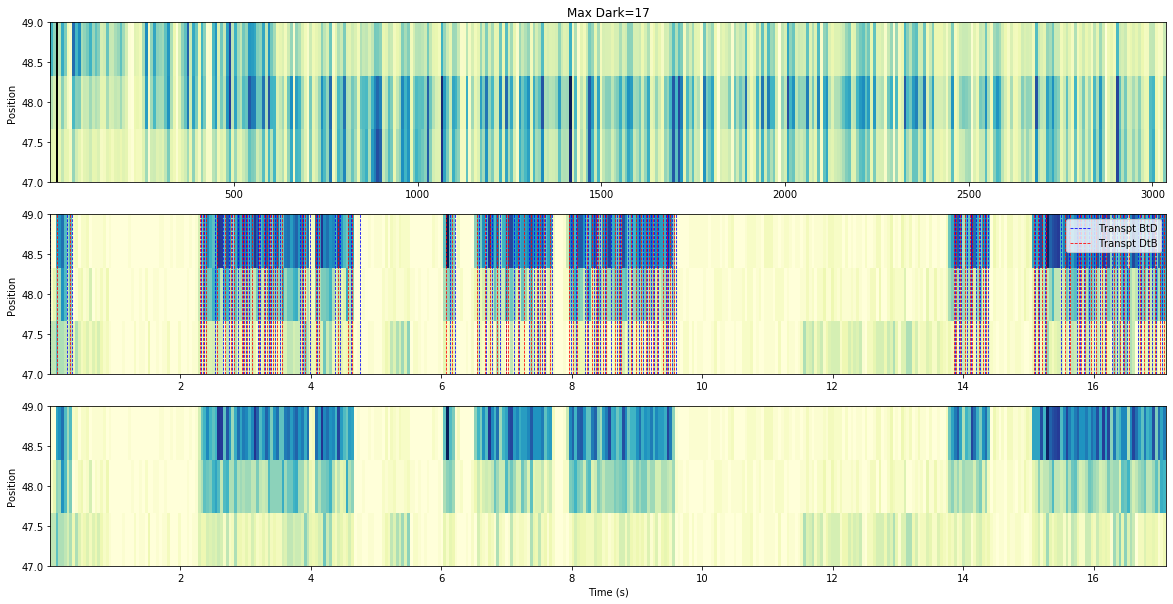

In [44]:
dT=2e7
rate_20e7=[]
for j in range (8,18):
    data=ion_5.data.copy()
    steps=j  # max dark photons in dT=> (steps+1): min bright photons in dT
    state=[]
    for i in range(min(data.index),max(data.index),steps):
        if (i+steps-1)<len(data):
            if (data["time"][i+steps-1]-data["time"][i])<dT: # bright state
                state.extend(([1]*steps))
            else: state.extend(([0]*steps))
        else:
            hits=len(data[i:]) #number of hits left
            max_dT=dT/(steps+1) #max mean time difference between two hits in bright state
            if (max(data["time"])-data["time"][i])>(max_dT*hits):
                state.extend(([0]*len(data[i:])))
            else: state.extend(([1]*len(data[i:])))
    data["state"]=state
    bright=data[data["state"]==1]
    dark=data[data["state"]==0]
    transitions()
    hline_BtD=np.array((data.iloc[BtD]["time"])*1e-9) #transition lines for the plot
    hline_DtB=np.array((data.iloc[DtB]["time"])*1e-9)
    rate=len(transpts)/((max(data["time"])-min(data["time"]))*1e-9)
    print ("Transitions", len(transpts), "Rate:",rate)
    rate_20e7.append(rate)

        
# plotting
    fig,(ax,ax1,ax2)=plt.subplots(3,1,figsize=(20,10))
    ax.set_title(f"Max Dark={j}") 
    ax.hist2d((data["time"]*1e-9),data["x"],bins=(400,3),cmap="YlGnBu")
    ax.set_ylabel("Position")

    #plotting the first 8000 events 

    ax1.hist2d((data["time"][:8000]*1e-9),data["x"][:8000],bins=(400,3),cmap="YlGnBu")
    ax1.vlines(hline_BtD[:],40,60,color="b",lw=0.8,ls="--",label="Transpt BtD")
    ax1.vlines(hline_DtB[:],40,60,color="r",lw=0.8,ls="--",label="Transpt DtB")
    ax1.set_ylabel("Position")
    ax1.legend()

    ax2.hist2d((data["time"][:8000]*1e-9),data["x"][:8000],bins=(400,3),cmap="YlGnBu")
    ax2.set_ylabel("Position")
    ax2.set_xlabel("Time (s)")
    ax.axvline(17,c="k",lw=2)

    plt.show()

### 18 ms

Transitions 9754 Rate: 3.2103506489856475


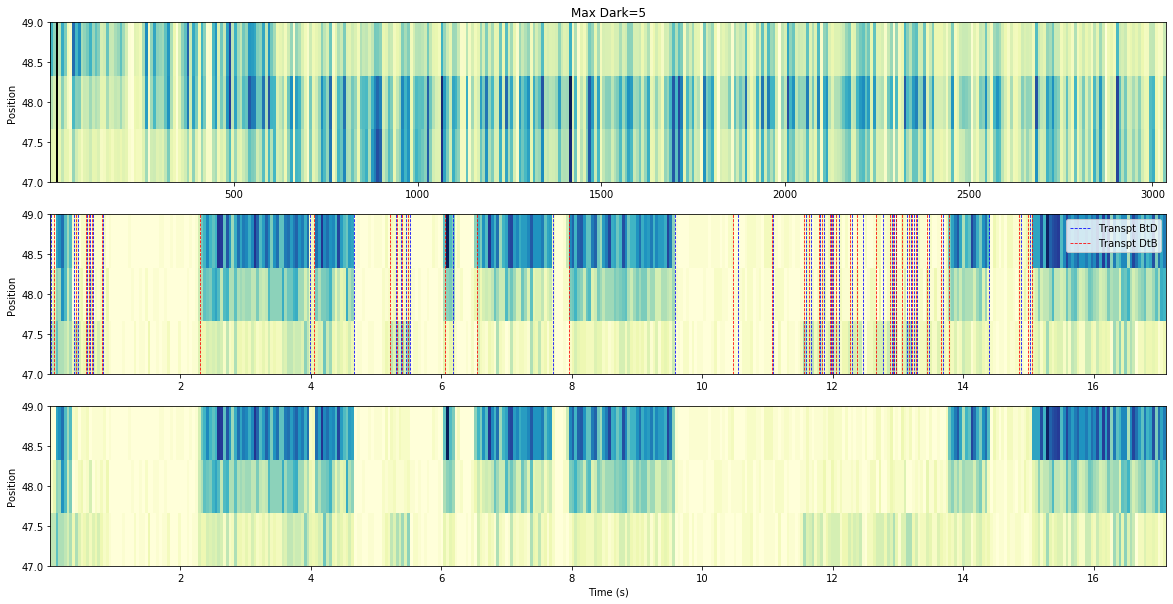

Transitions 5894 Rate: 1.9399022683126312


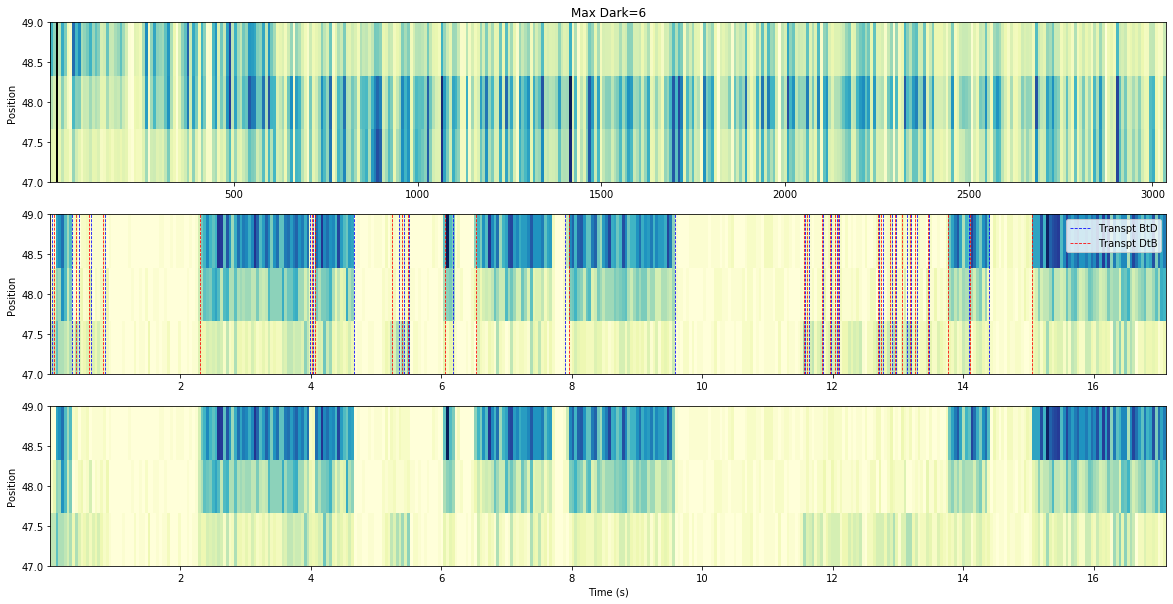

Transitions 3786 Rate: 1.246092634515036


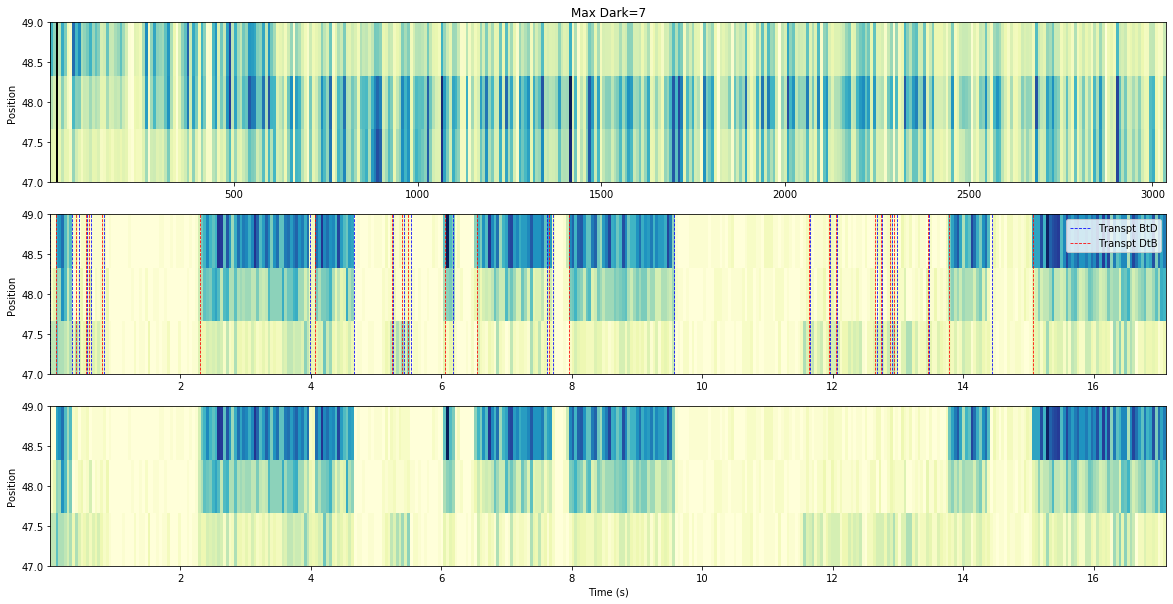

Transitions 2824 Rate: 0.9294679344612947


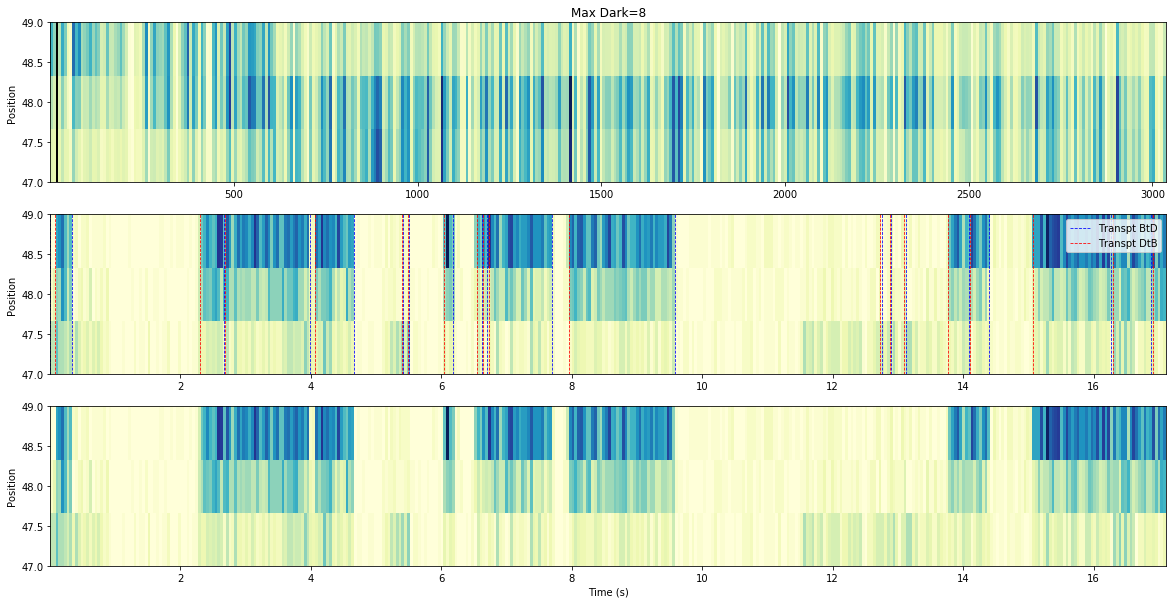

Transitions 2632 Rate: 0.8662746471324815


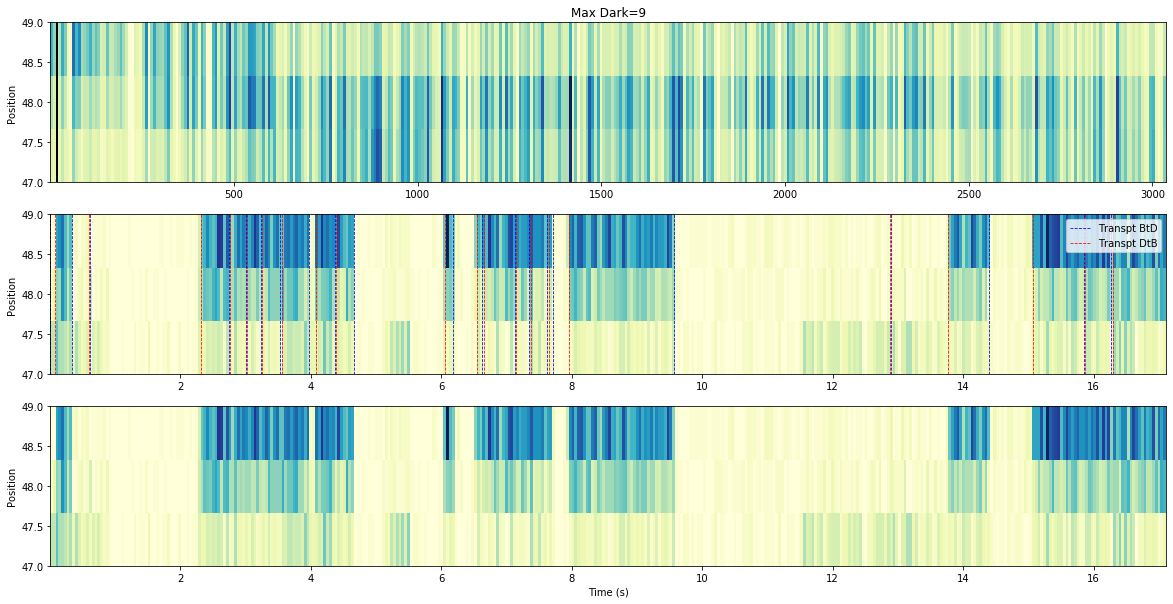

Transitions 2916 Rate: 0.959748051306351


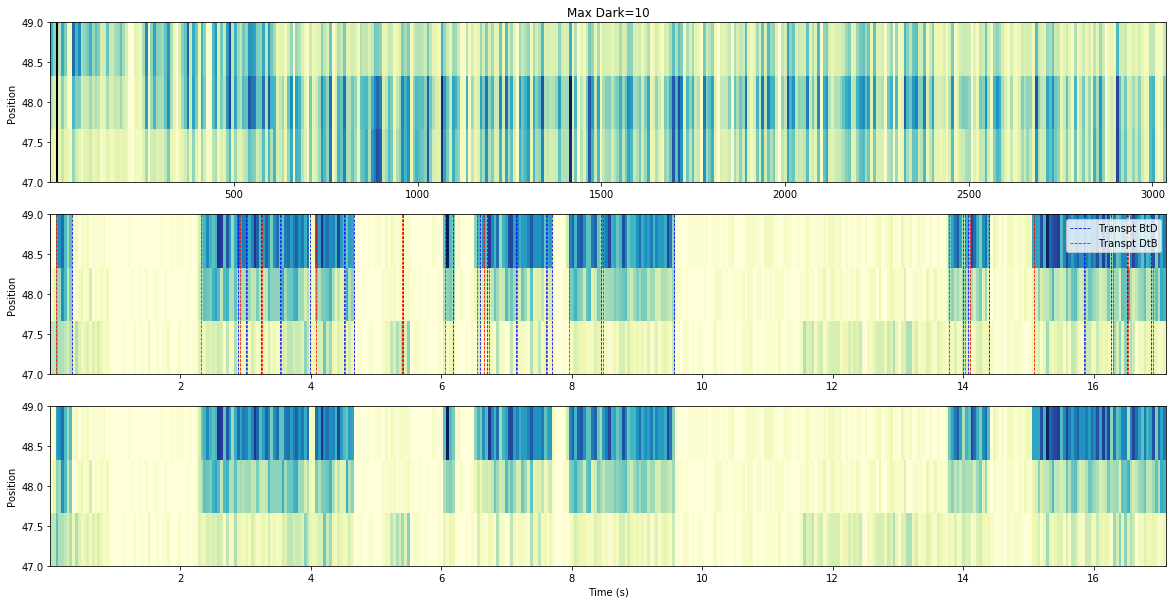

Transitions 3704 Rate: 1.2191038347183554


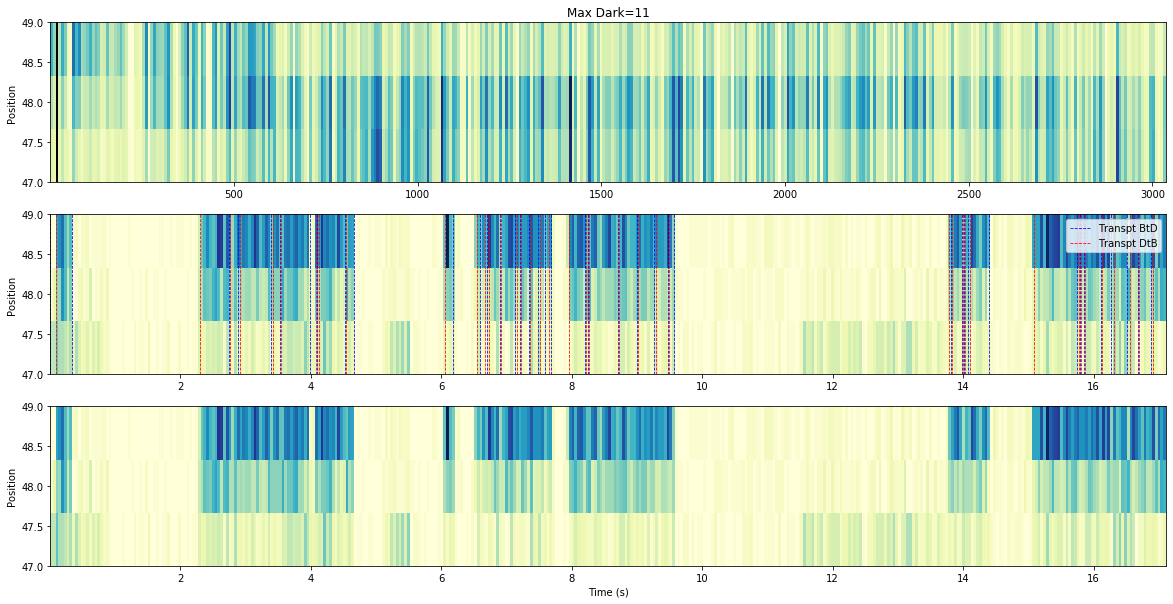

In [29]:
dT=1.8e7
rate_18e7=[]
for j in range (5,12):
    data=ion_5.data.copy()
    steps=j  # max dark photons in dT=> (steps+1): min bright photons in dT
    state=[]
    for i in range(min(data.index),max(data.index),steps):
        if (i+steps-1)<len(data):
            if (data["time"][i+steps-1]-data["time"][i])<dT: # bright state
                state.extend(([1]*steps))
            else: state.extend(([0]*steps))
        else:
            hits=len(data[i:]) #number of hits left
            max_dT=dT/(steps+1) #max mean time difference between two hits in bright state
            if (max(data["time"])-data["time"][i])>(max_dT*hits):
                state.extend(([0]*len(data[i:])))
            else: state.extend(([1]*len(data[i:])))
    data["state"]=state
    bright=data[data["state"]==1]
    dark=data[data["state"]==0]
    transitions()
    hline_BtD=np.array((data.iloc[BtD]["time"])*1e-9) #transition lines for the plot
    hline_DtB=np.array((data.iloc[DtB]["time"])*1e-9)
    rate=len(transpts)/((max(data["time"])-min(data["time"]))*1e-9)
    print ("Transitions", len(transpts), "Rate:",rate)
    rate_18e7.append(rate)

        
# plotting
    fig,(ax,ax1,ax2)=plt.subplots(3,1,figsize=(20,10))
    ax.set_title(f"Max Dark={j}") 
    ax.hist2d((data["time"]*1e-9),data["x"],bins=(400,3),cmap="YlGnBu")
    ax.set_ylabel("Position")

    #plotting the first 8000 events 

    ax1.hist2d((data["time"][:8000]*1e-9),data["x"][:8000],bins=(400,3),cmap="YlGnBu")
    ax1.vlines(hline_BtD[:],40,60,color="b",lw=0.8,ls="--",label="Transpt BtD")
    ax1.vlines(hline_DtB[:],40,60,color="r",lw=0.8,ls="--",label="Transpt DtB")
    ax1.set_ylabel("Position")
    ax1.legend()

    ax2.hist2d((data["time"][:8000]*1e-9),data["x"][:8000],bins=(400,3),cmap="YlGnBu")
    ax2.set_ylabel("Position")
    ax2.set_xlabel("Time (s)")
    ax.axvline(17,c="k",lw=2)

    plt.show()

### 16 ms

Transitions 8698 Rate: 2.8627875686771747


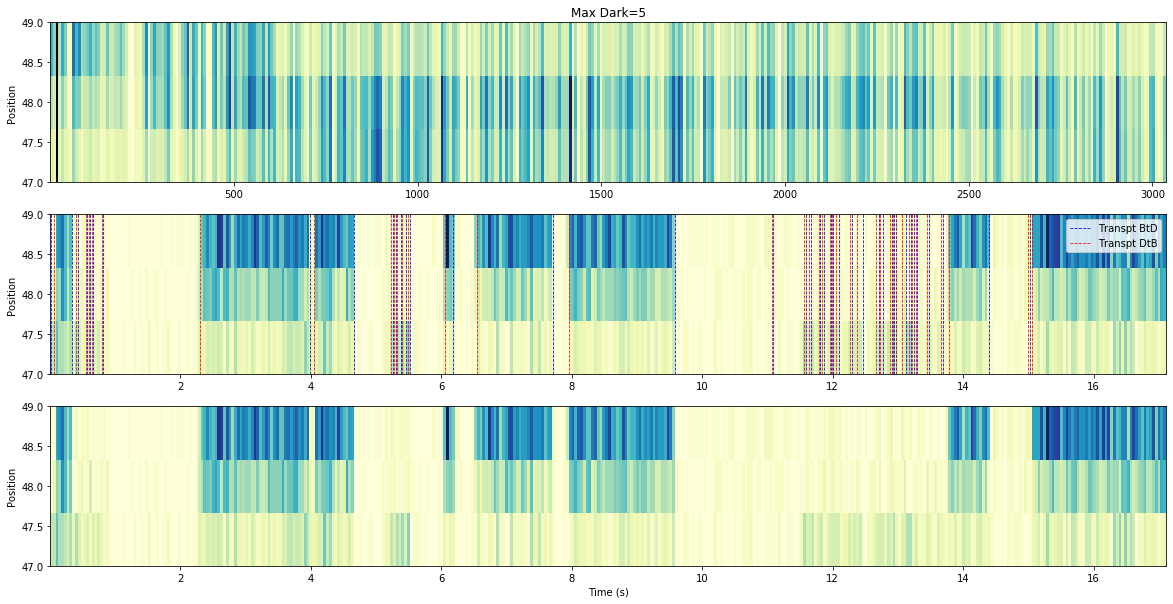

Transitions 5048 Rate: 1.661456846020048


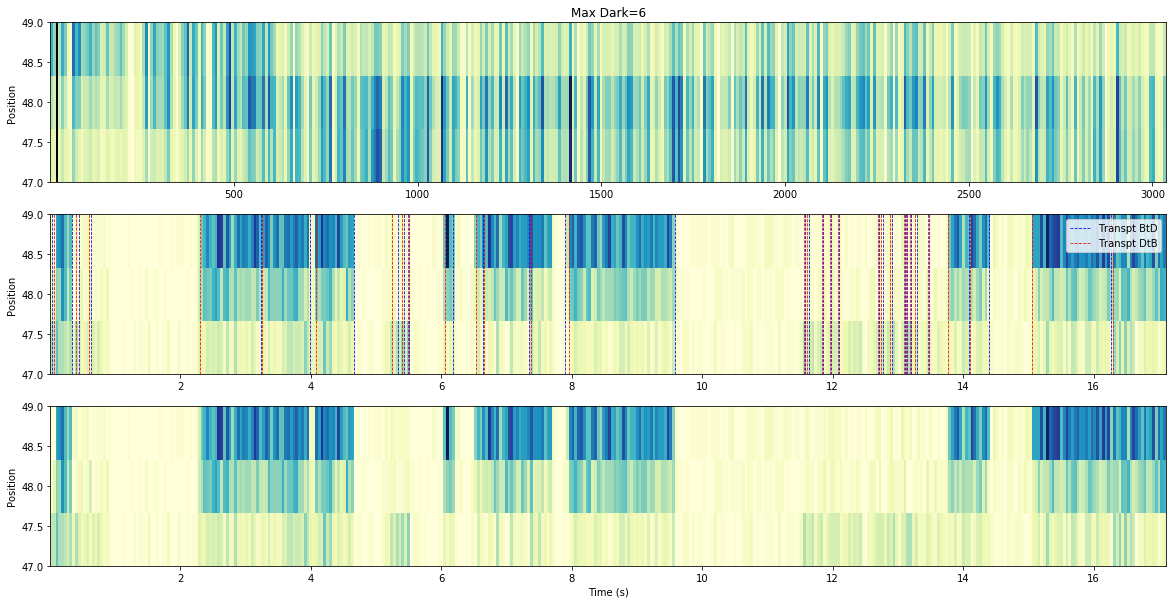

Transitions 3460 Rate: 1.1387956987379886


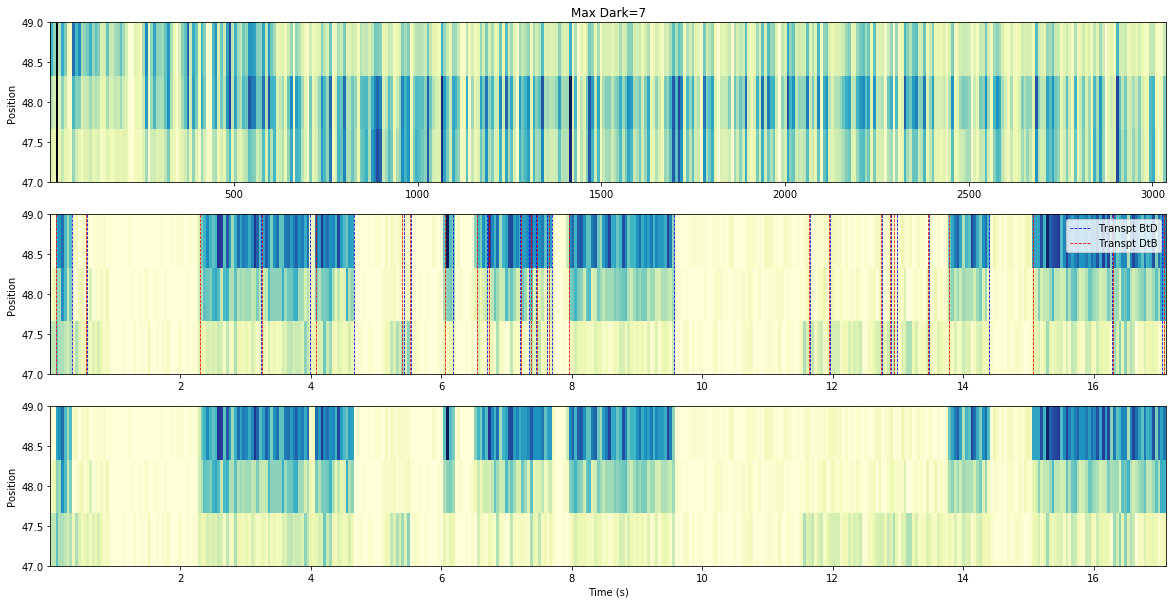

Transitions 2974 Rate: 0.97883769018693


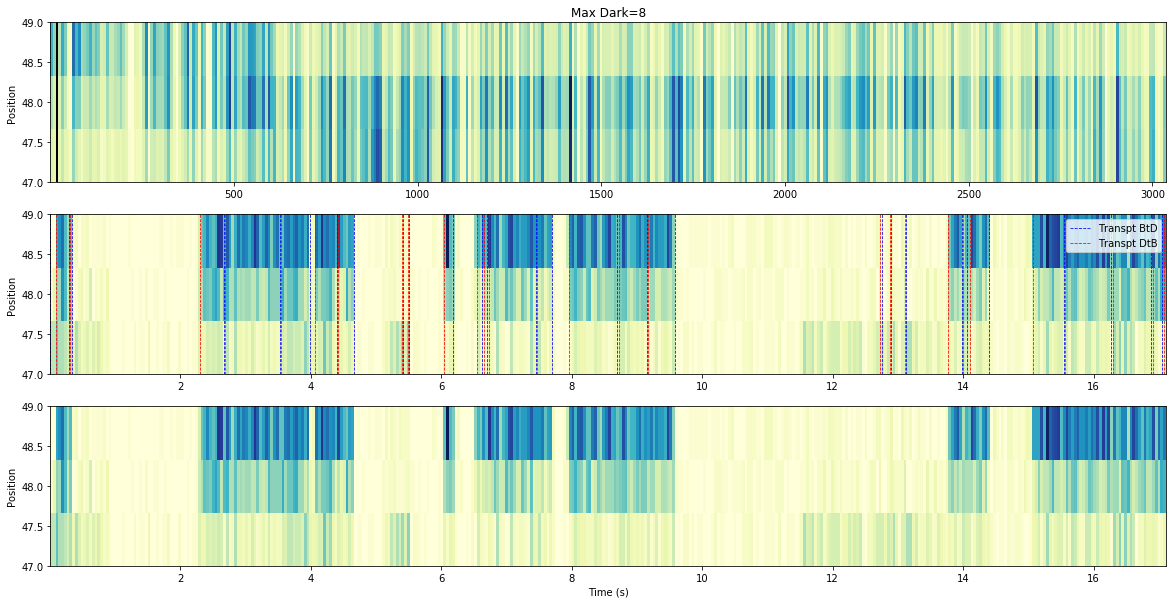

Transitions 3530 Rate: 1.1618349180766183


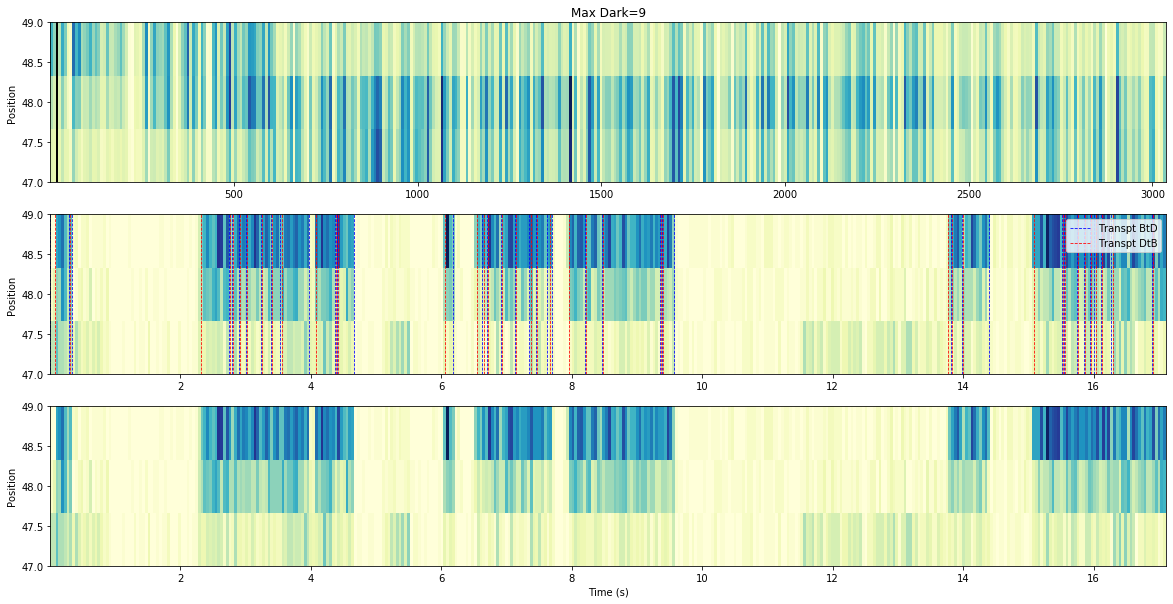

Transitions 4704 Rate: 1.5482355395559244


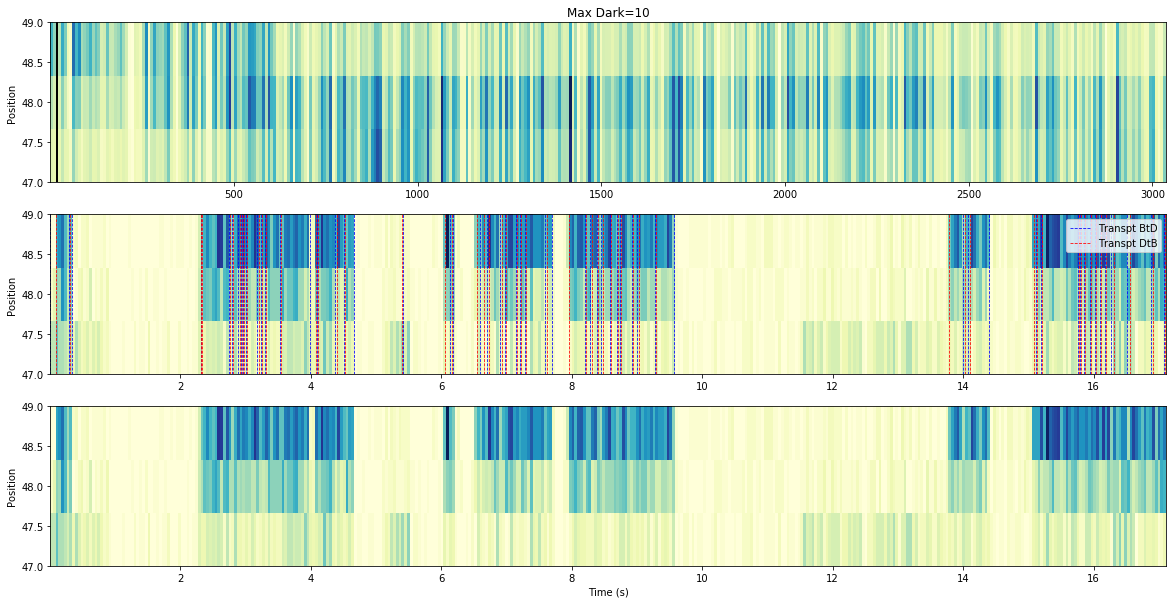

Transitions 6738 Rate: 2.2176894271955394


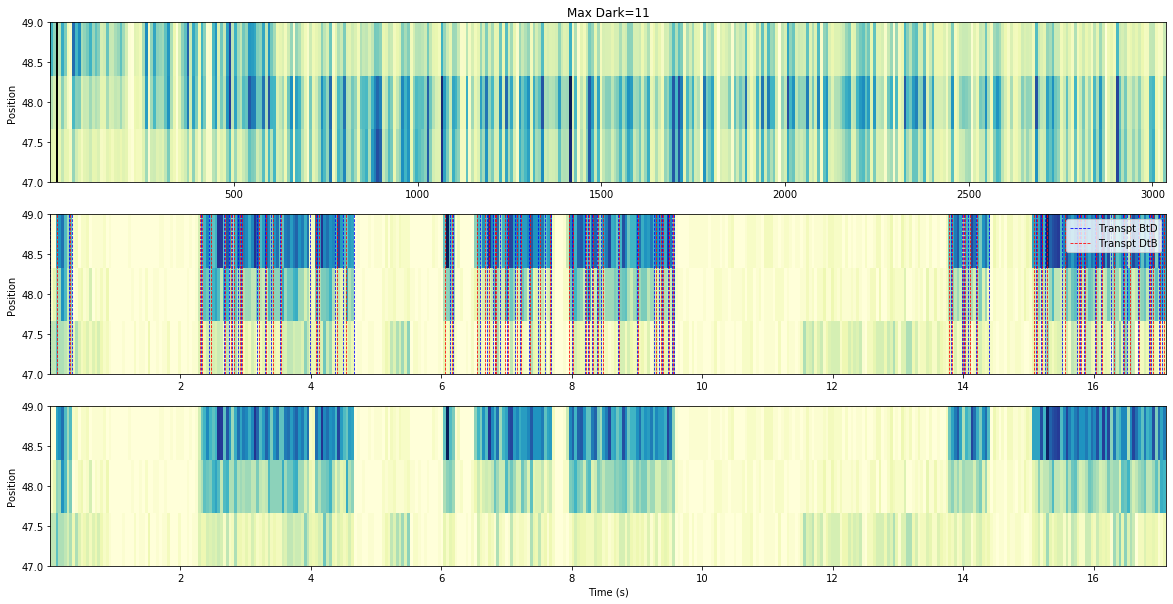

In [30]:
dT=1.6e7
rate_16e7=[]
for j in range (5,12):
    data=ion_5.data.copy()
    steps=j  # max dark photons in dT=> (steps+1): min bright photons in dT
    state=[]
    for i in range(min(data.index),max(data.index),steps):
        if (i+steps-1)<len(data):
            if (data["time"][i+steps-1]-data["time"][i])<dT: # bright state
                state.extend(([1]*steps))
            else: state.extend(([0]*steps))
        else:
            hits=len(data[i:]) #number of hits left
            max_dT=dT/(steps+1) #max mean time difference between two hits in bright state
            if (max(data["time"])-data["time"][i])>(max_dT*hits):
                state.extend(([0]*len(data[i:])))
            else: state.extend(([1]*len(data[i:])))
    data["state"]=state
    bright=data[data["state"]==1]
    dark=data[data["state"]==0]
    transitions()
    hline_BtD=np.array((data.iloc[BtD]["time"])*1e-9) #transition lines for the plot
    hline_DtB=np.array((data.iloc[DtB]["time"])*1e-9)
    rate=len(transpts)/((max(data["time"])-min(data["time"]))*1e-9)
    print ("Transitions", len(transpts), "Rate:",rate)
    rate_16e7.append(rate)

    
# plotting
    fig,(ax,ax1,ax2)=plt.subplots(3,1,figsize=(20,10))
    ax.set_title(f"Max Dark={j}") 
    ax.hist2d((data["time"]*1e-9),data["x"],bins=(400,3),cmap="YlGnBu")
    ax.set_ylabel("Position")

    #plotting the first 8000 events 

    ax1.hist2d((data["time"][:8000]*1e-9),data["x"][:8000],bins=(400,3),cmap="YlGnBu")
    ax1.vlines(hline_BtD,40,60,color="b",lw=0.8,ls="--",label="Transpt BtD")
    ax1.vlines(hline_DtB,40,60,color="r",lw=0.8,ls="--",label="Transpt DtB")
    ax1.set_ylabel("Position")
    ax1.legend()

    ax2.hist2d((data["time"][:8000]*1e-9),data["x"][:8000],bins=(400,3),cmap="YlGnBu")
    ax2.set_ylabel("Position")
    ax2.set_xlabel("Time (s)")
    ax.axvline(17,c="k",lw=2)

    plt.show()

Transitions 4106 Rate: 1.351414780063058


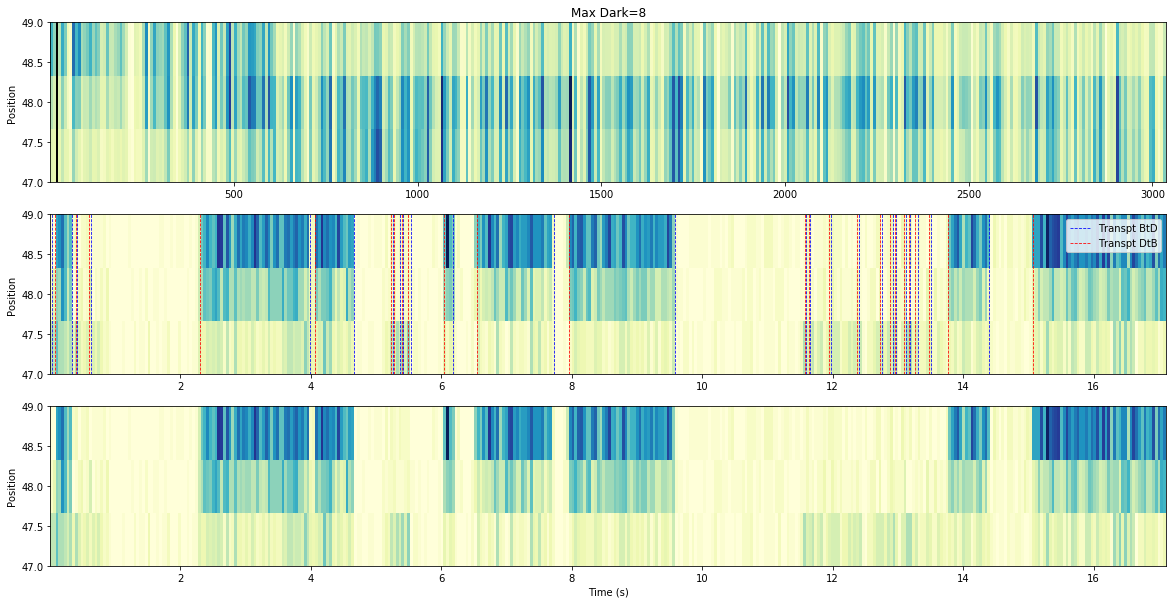

Transitions 3030 Rate: 0.9972690656578339


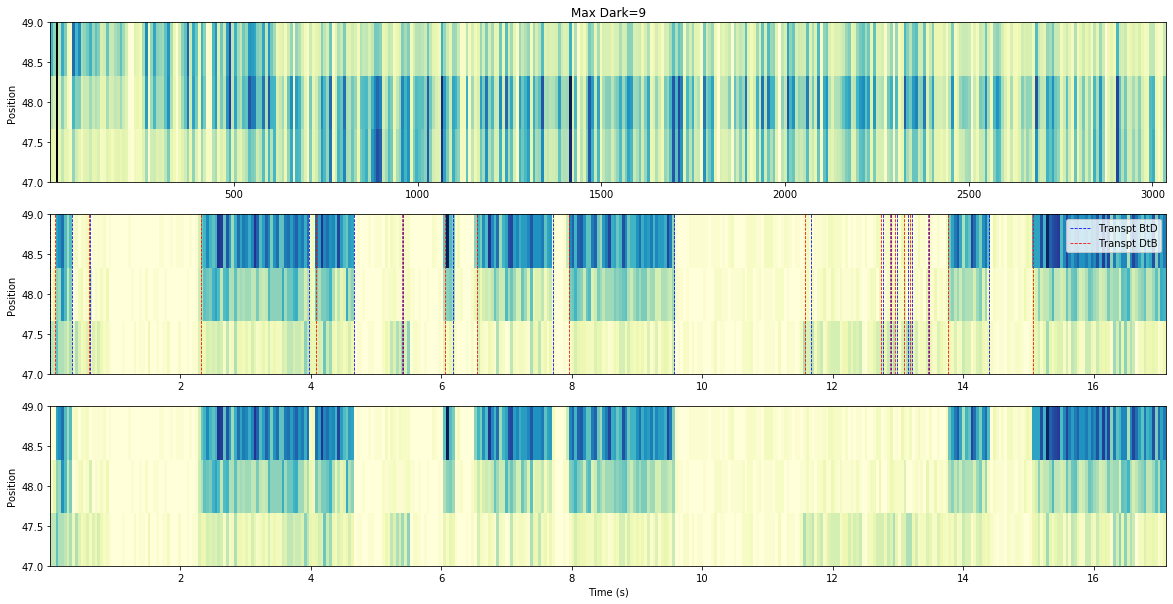

Transitions 2516 Rate: 0.8280953693713234


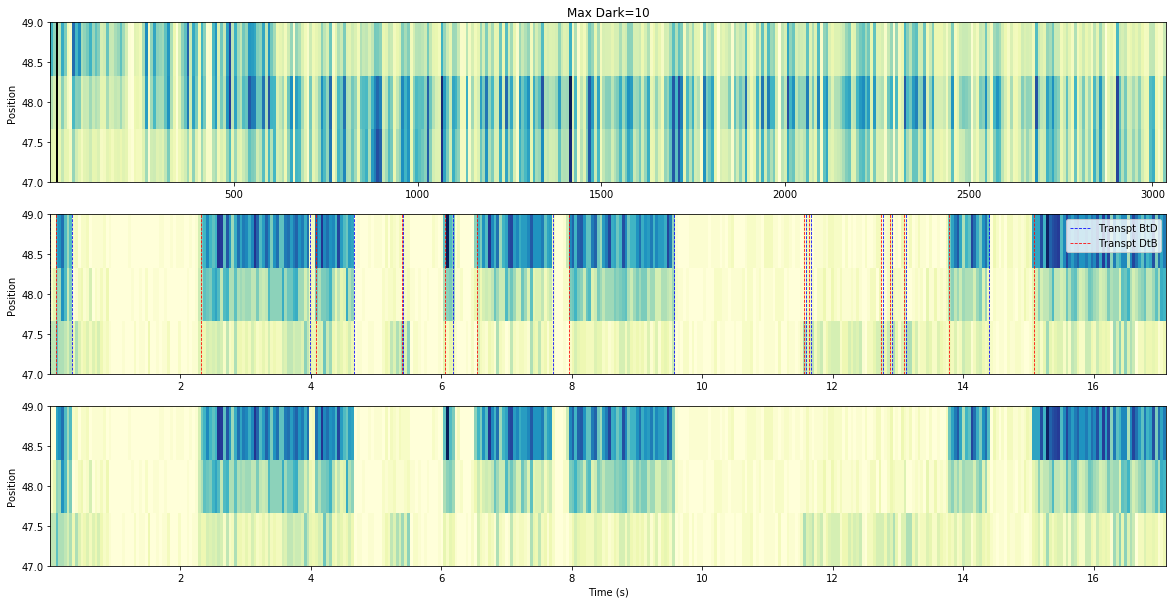

Transitions 2246 Rate: 0.7392298090651799


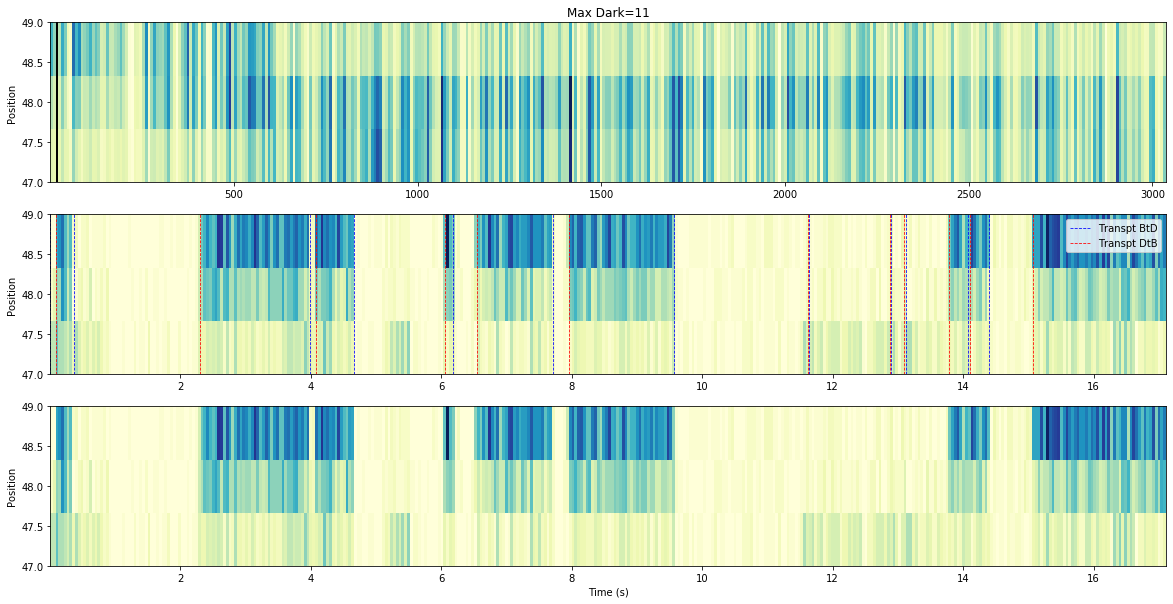

Transitions 2184 Rate: 0.7188236433652506


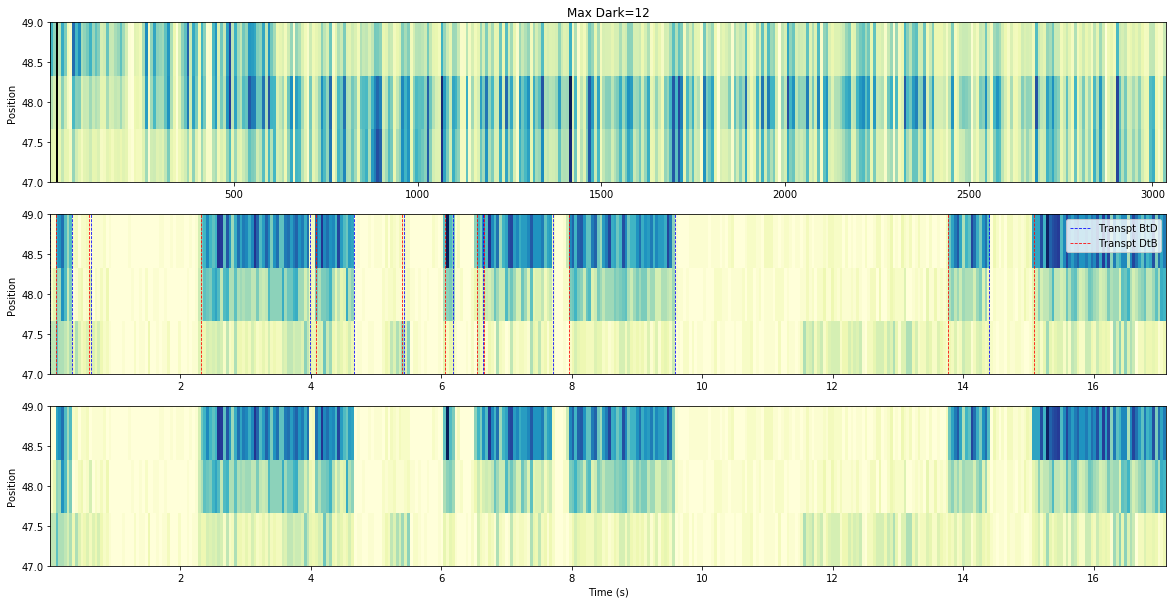

Transitions 2226 Rate: 0.7326471749684285


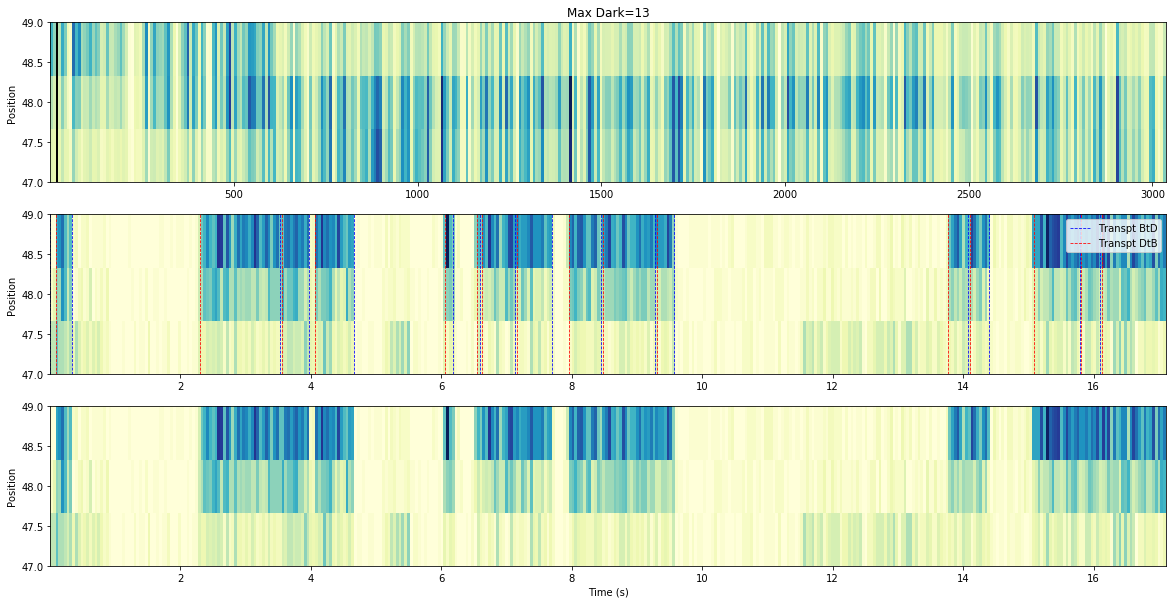

In [26]:
dT=3e7
rate_30e7=[]
for j in range (5,14):
    data=ion_5.data.copy()
    steps=j  # max dark photons in dT=> (steps+1): min bright photons in dT
    state=[]
    for i in range(min(data.index),max(data.index),steps):
        if (i+steps-1)<len(data):
            if (data["time"][i+steps-1]-data["time"][i])<dT: # bright state
                state.extend(([1]*steps))
            else: state.extend(([0]*steps))
        else:
            hits=len(data[i:]) #number of hits left
            max_dT=dT/(steps+1) #max mean time difference between two hits in bright state
            if (max(data["time"])-data["time"][i])>(max_dT*hits):
                state.extend(([0]*len(data[i:])))
            else: state.extend(([1]*len(data[i:])))
    data["state"]=state
    bright=data[data["state"]==1]
    dark=data[data["state"]==0]
    transitions()
    hline_BtD=np.array((data.iloc[BtD]["time"])*1e-9) #transition lines for the plot
    hline_DtB=np.array((data.iloc[DtB]["time"])*1e-9)
    rate=len(transpts)/((max(data["time"])-min(data["time"]))*1e-9)
    print ("Transitions", len(transpts), "Rate:",rate)
    rate_30e7.append(rate)

        
# plotting
    fig,(ax,ax1,ax2)=plt.subplots(3,1,figsize=(20,10))
    ax.set_title(f"Max Dark={j}") 
    ax.hist2d((data["time"]*1e-9),data["x"],bins=(400,3),cmap="YlGnBu")
    ax.set_ylabel("Position")

    #plotting the first 8000 events 

    ax1.hist2d((data["time"][:8000]*1e-9),data["x"][:8000],bins=(400,3),cmap="YlGnBu")
    ax1.vlines(hline_BtD[:],40,60,color="b",lw=0.8,ls="--",label="Transpt BtD")
    ax1.vlines(hline_DtB[:],40,60,color="r",lw=0.8,ls="--",label="Transpt DtB")
    ax1.set_ylabel("Position")
    ax1.legend()

    ax2.hist2d((data["time"][:8000]*1e-9),data["x"][:8000],bins=(400,3),cmap="YlGnBu")
    ax2.set_ylabel("Position")
    ax2.set_xlabel("Time (s)")
    ax.axvline(17,c="k",lw=2)

    plt.show()

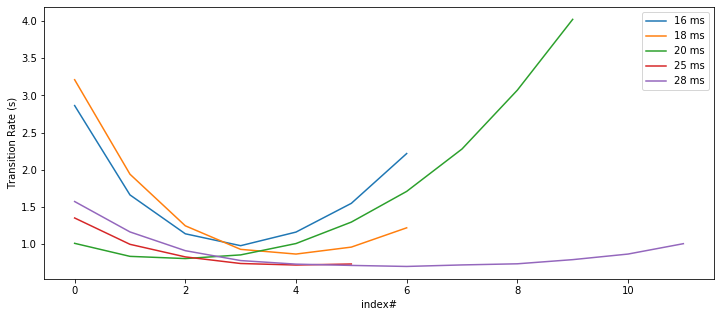

In [59]:
fig,ax=plt.subplots(figsize=(12,5))
ax.plot(rate_16e7,label="16 ms")
ax.plot(rate_18e7,label="18 ms")
ax.plot(rate_20e7,label="20 ms")
ax.plot(rate_25e7,label="25 ms")
ax.plot(rate_28e7,label="28 ms")
ax.set_xlabel("index#")
ax.set_ylabel("Transition Rate (s)")
ax.legend()

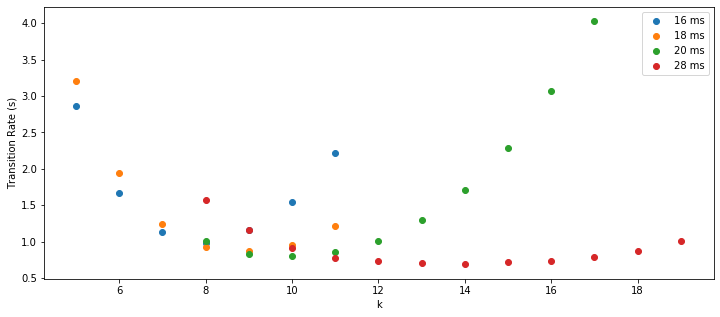

In [60]:
fig,ax=plt.subplots(figsize=(12,5))
ax.scatter(np.arange(5,12),rate_16e7,label="16 ms")
ax.scatter(np.arange(5,12),rate_18e7,label="18 ms")
ax.scatter(np.arange(8,18),rate_20e7,label="20 ms")
#ax.scatter(np.arange(7,18),rate_25e7,label="25 ms")
ax.scatter(np.arange(8,20),rate_28e7,label="28 ms")
ax.set_xlabel("k")
ax.set_ylabel("Transition Rate (s)")
ax.legend()

#### Observation: 
As k is varied, transition rate first decreases and then increases. 